# Part 1: Data Cleaning, EDA and Preprocessing of Train and Test Data

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler

## Set Display options

In [ ]:
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

## Load Data

In [7]:
ames_df=pd.read_csv('../datasets/train.csv',sep=',')

In [8]:
#size of the dataframe
ames_df.shape

(2051, 81)

In [9]:
ames_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Data Cleaning and Exploratory Data Analysis

In [10]:
ames_df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [11]:
ames_df.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [12]:
ames_df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [13]:
#convert ID, PID  into string
ames_df['Id']=ames_df['Id'].astype(str)

In [14]:
ames_df['PID']=ames_df['PID'].astype(str)

In [15]:
ames_df.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [16]:
ames_df['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [17]:
ames_df['Sale Type'].value_counts()

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Oth         4
Con         4
Name: Sale Type, dtype: int64

In [18]:
ames_df['Yr Sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64

In [19]:
ames_df['Functional'].value_counts()

Typ     1915
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: Functional, dtype: int64

In [20]:
#Fix Garage Year Build (2207 doesn't make sense)
ames_df[ames_df['Garage Yr Blt']>2010]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300


In [21]:
# Update incorrect year in row 1699 to match Year Remod/Add
ames_df.loc[1699,"Garage Yr Blt"] = ames_df.loc[1699,"Year Remod/Add"]

In [22]:
ames_df.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.604543,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,24.914493,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2010.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


## Imputing missing values (NaN)

In [23]:
#Update Garage Build Year with null values with Year Built
ames_df['Garage Yr Blt'] = ames_df.apply(lambda row: row['Year Built'] if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

In [24]:
ames_df.isnull().sum()[ames_df.isnull().sum() != 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [25]:
#Analyzing the relationship between Lot Shape, Lot Area, Lot Config and Lot Frontage
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(ames_df['Lot Shape'])
ames_df['Lot Shape']=le.transform(ames_df['Lot Shape'])
le.fit(ames_df['Lot Config'])
ames_df['Lot Config']=le.transform(ames_df['Lot Config'])


In [26]:
ames_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,0,Lvl,AllPub,1,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,0,Lvl,AllPub,1,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,3,Lvl,AllPub,4,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,3,Lvl,AllPub,4,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,0,Lvl,AllPub,4,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


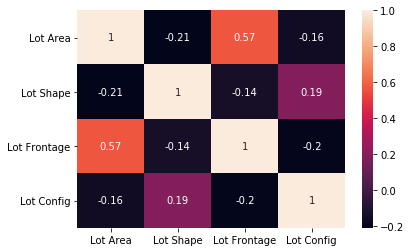

In [27]:
#heat map to see the Lot relationships
sns.heatmap(ames_df[['Lot Area','Lot Shape','Lot Frontage','Lot Config']].corr(),annot=True)

0.002673257457517556 43.33160738510907


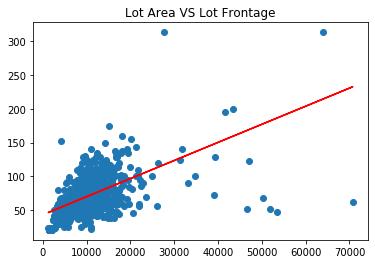

In [28]:
#Lot Area shows a strong correlation to Lot Frontage
#Fitted Line to fit relationship between Lot Frontage and Lot Area
x=ames_df[ames_df['Lot Frontage'].isnull()==False]['Lot Area']
y=ames_df[ames_df['Lot Frontage'].isnull()==False]['Lot Frontage']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.scatter(x,y)
plt.title('Lot Area VS Lot Frontage')
plt.plot(x,intercept+slope*x,'r',label='fitted line')
print(slope,intercept)

In [29]:
#Fill in null Lot Frontage values with results from Linear relationship

In [30]:
ames_df['Lot Frontage'] = ames_df.apply(lambda row: round(row['Lot Area']*0.003 +43.332,1)if np.isnan(row['Lot Frontage']) else row['Lot Frontage'],axis =1)

In [31]:
ames_df.isnull().sum()[ames_df.isnull().sum() != 0]

Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [32]:
#Not recorded features like Alley,Fence,Pool QC,Misc Feature and Fireplace Qu can be converted to NA from NaN and then dummified

In [33]:
ames_df["Alley"] = ["NA" if (str(ames_df.loc[i, "Alley"]) == "nan" ) else ames_df.loc[i, "Alley"] for i in ames_df.index]

In [34]:
ames_df["Fireplace Qu"] = ["NA" if (str(ames_df.loc[i, "Fireplace Qu"]) == "nan" and ames_df.loc[i,"Fireplaces"] == 0) else ames_df.loc[i, "Fireplace Qu"] for i in ames_df.index]

In [35]:
ames_df["Pool QC"] = ["NA" if (str(ames_df.loc[i, "Pool QC"]) == "nan" and ames_df.loc[i,"Pool Area"] == 0) else ames_df.loc[i, "Pool QC"] for i in ames_df.index]

In [36]:
ames_df["Misc Feature"] = ["NA" if (str(ames_df.loc[i, "Misc Feature"]) == "nan" and ames_df.loc[i,"Misc Val"] == 0) else ames_df.loc[i, "Misc Feature"] for i in ames_df.index]

In [37]:
ames_df["Fence"] = ["NA" if (str(ames_df.loc[i, "Fence"]) == "nan" ) else ames_df.loc[i, "Fence"] for i in ames_df.index]

In [38]:
ames_df.isnull().sum()[ames_df.isnull().sum() != 0]

Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Qual          55
Bsmt Cond          55
Bsmt Exposure      58
BsmtFin Type 1     55
BsmtFin SF 1        1
BsmtFin Type 2     56
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Type       113
Garage Finish     114
Garage Cars         1
Garage Area         1
Garage Qual       114
Garage Cond       114
dtype: int64

In [39]:
ames_df.loc[ames_df["Garage Area"].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,3,Lvl,AllPub,4,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,1923.0,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [40]:
#Since Garage Area is numerical, we cannot subsititute NA without converting the entire column into a string/object and hence it will be dropped
ames_df.drop(index=1712,inplace=True)

In [41]:
ames_df.isnull().sum()[ames_df.isnull().sum() != 0]

Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Qual          55
Bsmt Cond          55
Bsmt Exposure      58
BsmtFin Type 1     55
BsmtFin SF 1        1
BsmtFin Type 2     56
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Type       113
Garage Finish     113
Garage Qual       113
Garage Cond       113
dtype: int64

In [42]:
#Convert the remaining Garage qualities to NA values
ames_df["Garage Type"] = ["NA" if (str(ames_df.loc[i, "Garage Type"]) == "nan" ) else ames_df.loc[i, "Garage Type"] for i in ames_df.index]

In [43]:
ames_df["Garage Finish"] = ["NA" if (str(ames_df.loc[i, "Garage Finish"]) == "nan" ) else ames_df.loc[i, "Garage Finish"] for i in ames_df.index]

In [44]:
ames_df["Garage Qual"] = ["NA" if (str(ames_df.loc[i, "Garage Qual"]) == "nan" ) else ames_df.loc[i, "Garage Qual"] for i in ames_df.index]

In [45]:
ames_df["Garage Cond"] = ["NA" if (str(ames_df.loc[i, "Garage Cond"]) == "nan" ) else ames_df.loc[i, "Garage Cond"] for i in ames_df.index]

In [46]:
ames_df.isnull().sum()[ames_df.isnull().sum() != 0]

Mas Vnr Type      22
Mas Vnr Area      22
Bsmt Qual         55
Bsmt Cond         55
Bsmt Exposure     58
BsmtFin Type 1    55
BsmtFin SF 1       1
BsmtFin Type 2    56
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
dtype: int64

In [47]:
ames_df.loc[ames_df["Total Bsmt SF"].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,0,Lvl,AllPub,3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [48]:
#Since Total Bsmt SF is numerical, we cannot subsititute NA without converting the entire column into a string/object and hence it will be dropped
ames_df.drop(index=1327,inplace=True)

In [49]:
ames_df.isnull().sum()[ames_df.isnull().sum() != 0]

Mas Vnr Type      22
Mas Vnr Area      22
Bsmt Qual         54
Bsmt Cond         54
Bsmt Exposure     57
BsmtFin Type 1    54
BsmtFin Type 2    55
Bsmt Full Bath     1
Bsmt Half Bath     1
dtype: int64

In [50]:
ames_df['BsmtFin Type 2'].value_counts()

Unf    1748
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [51]:
ames_df['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    292
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

In [52]:
ames_df['Bsmt Qual'].value_counts()

TA    887
Gd    863
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

In [53]:
ames_df['Bsmt Cond'].value_counts()

TA    1833
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [54]:
ames_df['Bsmt Exposure'].value_counts()

No    1338
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

In [55]:
#Since most of the 'BsmtFin Type 2' basements are Unf we will assume the remaining 'BsmtFin Type 1' & 'BsmtFin Type 2' nan values can be substituted with 'Unf' 
ames_df["BsmtFin Type 2"] = ["Unf" if (str(ames_df.loc[i, "BsmtFin Type 2"]) == "nan" ) else ames_df.loc[i, "BsmtFin Type 2"] for i in ames_df.index]

In [56]:
#Since most of the 'BsmtFin Type 2' values are Unf we will assume the remaining 'BsmtFin Type 1' & 'BsmtFin Type 2' nan values can be substituted with 'Unf' 
ames_df["BsmtFin Type 1"] = ["Unf" if (str(ames_df.loc[i, "BsmtFin Type 1"]) == "nan" ) else ames_df.loc[i, "BsmtFin Type 1"] for i in ames_df.index]

In [57]:
#Since most of the 'Bsmt Condition' values are TA we will assume the remaining 'Bsmt Qual' & 'Bsmt Cond' nan values can be substituted with 'TA' 
ames_df["Bsmt Cond"] = ["TA" if (str(ames_df.loc[i, "Bsmt Cond"]) == "nan" ) else ames_df.loc[i, "Bsmt Cond"] for i in ames_df.index]

In [58]:
#Since most of the 'Bsmt Qual' values are TA we will assume the remaining 'Bsmt Qual' & 'Bsmt Cond' nan values can be substituted with 'TA' 
ames_df["Bsmt Qual"] = ["TA" if (str(ames_df.loc[i, "Bsmt Qual"]) == "nan" ) else ames_df.loc[i, "Bsmt Qual"] for i in ames_df.index]

In [59]:
#Since most of the 'Bsmt Exposure' values are 'No' we will assume the remaining 'Bsmt Exposure' nan values be substituted by No
ames_df["Bsmt Exposure"] = ["No" if (str(ames_df.loc[i, "Bsmt Exposure"]) == "nan" ) else ames_df.loc[i, "Bsmt Exposure"] for i in ames_df.index]

In [60]:
ames_df.isnull().sum()[ames_df.isnull().sum() != 0]

Mas Vnr Type      22
Mas Vnr Area      22
Bsmt Full Bath     1
Bsmt Half Bath     1
dtype: int64

In [61]:
ames_df['Mas Vnr Type'].value_counts()

None       1216
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [62]:
ames_df['Mas Vnr Area'].value_counts()

0.0      1214
120.0      11
176.0      10
200.0      10
180.0       9
         ... 
57.0        1
572.0       1
65.0        1
567.0       1
161.0       1
Name: Mas Vnr Area, Length: 373, dtype: int64

In [63]:
#Mas Vnr Type is None and Mas Vnr Area is 0.0 for most of the inputs
ames_df["Mas Vnr Type"] = ["None" if (str(ames_df.loc[i, "Mas Vnr Type"]) == "nan" ) else ames_df.loc[i, "Mas Vnr Type"] for i in ames_df.index]

In [64]:
ames_df["Mas Vnr Area"] = [0.0 if (str(ames_df.loc[i, "Mas Vnr Area"]) == "nan" ) else ames_df.loc[i, "Mas Vnr Area"] for i in ames_df.index]

In [65]:
ames_df.isnull().sum()[ames_df.isnull().sum() != 0]

Bsmt Full Bath    1
Bsmt Half Bath    1
dtype: int64

In [66]:
ames_df.loc[ames_df["Bsmt Full Bath"].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,NA,0,Lvl,AllPub,4,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,TA,TA,No,Unf,0.0,Unf,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NA,NA,NA,0,7,2008,WD,284700


In [67]:
ames_df['Bsmt Full Bath'].value_counts()

0.0    1199
1.0     824
2.0      23
3.0       2
Name: Bsmt Full Bath, dtype: int64

In [68]:
ames_df['Bsmt Half Bath'].value_counts()

0.0    1922
1.0     122
2.0       4
Name: Bsmt Half Bath, dtype: int64

In [69]:
ames_df['Bsmt Full Bath'] = [0.0 if (str(ames_df.loc[i,'Bsmt Full Bath']) == "nan" ) else ames_df.loc[i, 'Bsmt Full Bath'] for i in ames_df.index]

In [70]:
ames_df['Bsmt Half Bath'] = [0.0 if (str(ames_df.loc[i,'Bsmt Half Bath']) == "nan" ) else ames_df.loc[i, 'Bsmt Half Bath'] for i in ames_df.index]

In [71]:
ames_df.isnull().sum()[ames_df.isnull().sum() != 0]

Series([], dtype: int64)

In [72]:
#All NaN values are resolved

## Check for outliers

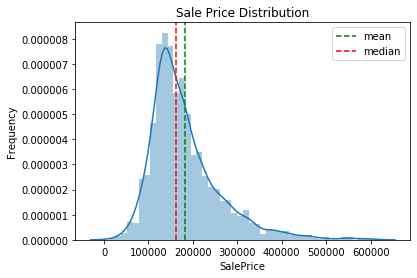

In [77]:
sns.distplot(ames_df['SalePrice'])
plt.ylabel('Frequency')
plt.title('Sale Price Distribution')
plt.axvline(ames_df['SalePrice'].mean(), linestyle = '--', color = 'g', label ='mean')
plt.axvline(ames_df['SalePrice'].median(), linestyle = '--', color = 'r', label ='median')
plt.legend()

In [78]:
#The distribution is skewed to the right indicating the presence of outliers

In [112]:
#Boxplot function
def boxplot(data,x,y):
    plt.figure(figsize=(20,15))
    bp = sns.boxplot(data=data,x=x,y=y)
    bp.set_xlabel(x,fontsize=15)
    bp.set_ylabel(y,fontsize=15)
    bp.tick_params(labelsize=15)

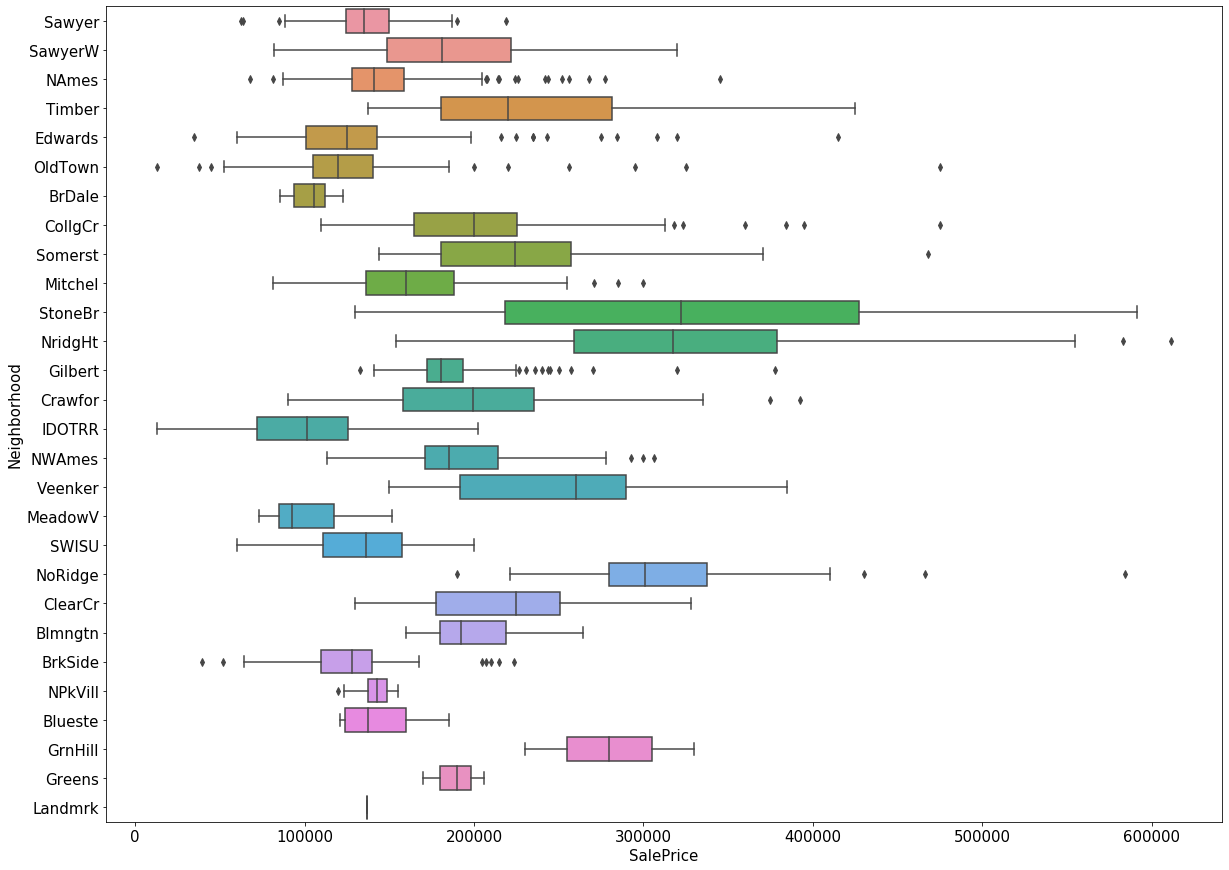

In [113]:
#Boxplot to identify Neighborhood's with most sales
boxplot(ames_df,x='SalePrice',y='Neighborhood')

In [ ]:
#From the above boxplots, Stone Brook, Northridge Heights and Northridge have the highest median prices

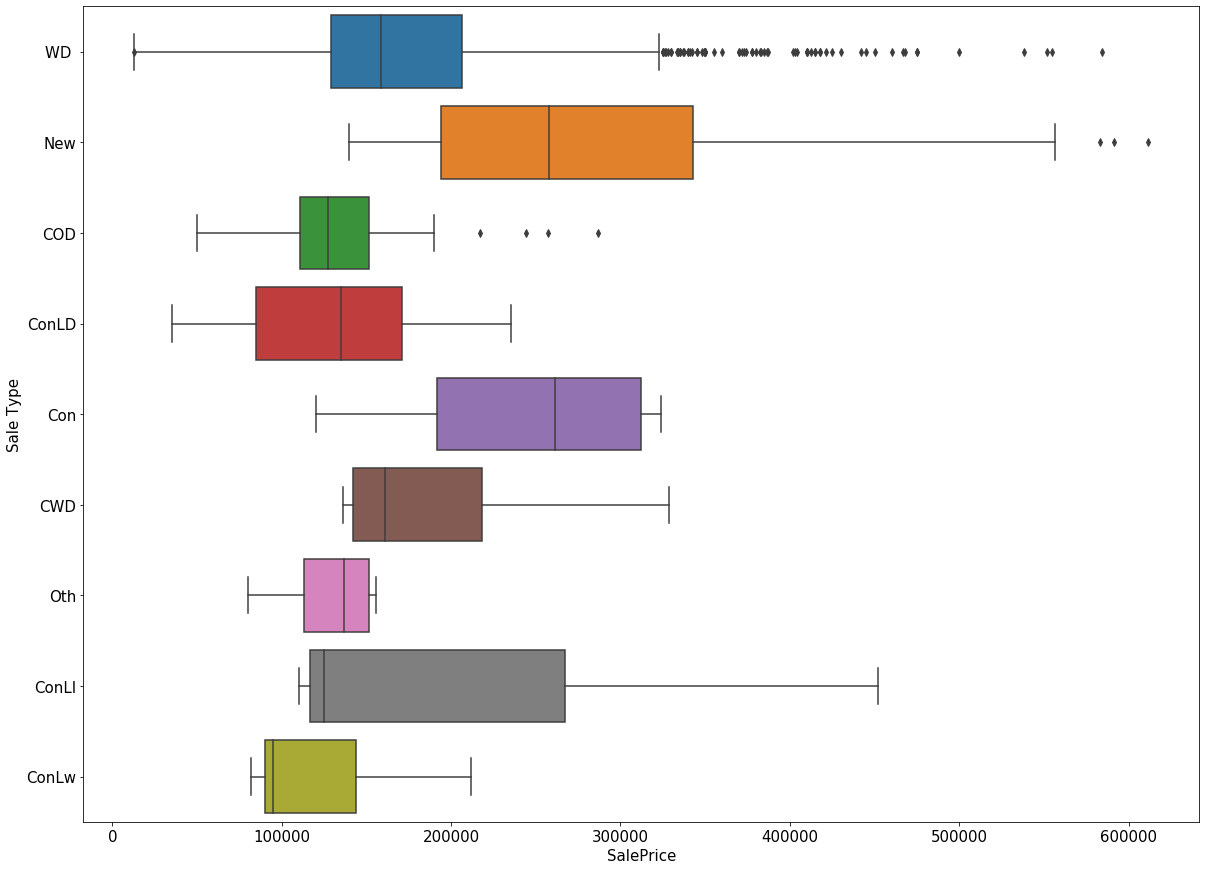

In [99]:
#Boxplot to identify Sale Types
boxplot(ames_df,x='SalePrice',y='Sale Type')

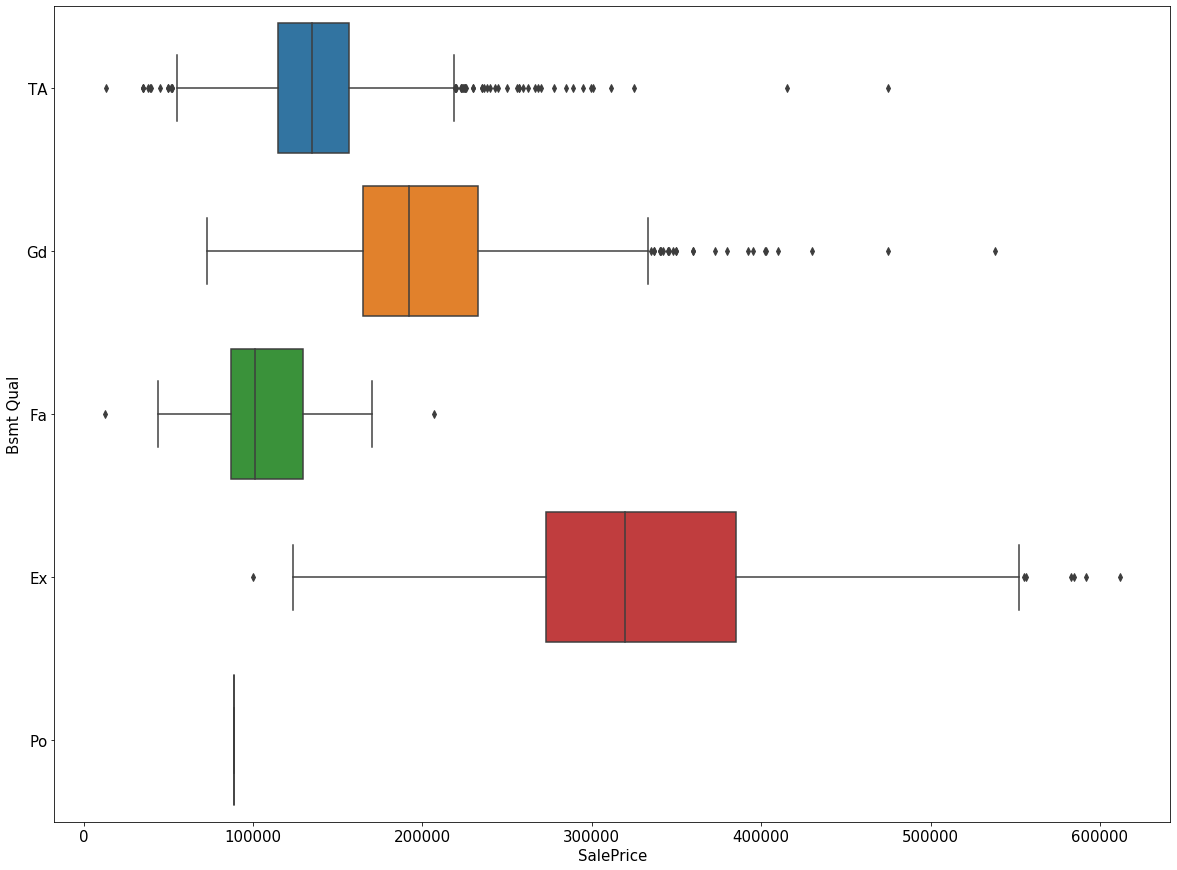

In [103]:
#Boxplot to depict relationship between Basement Quality and sale price 
boxplot(ames_df,x='SalePrice',y='Bsmt Qual')

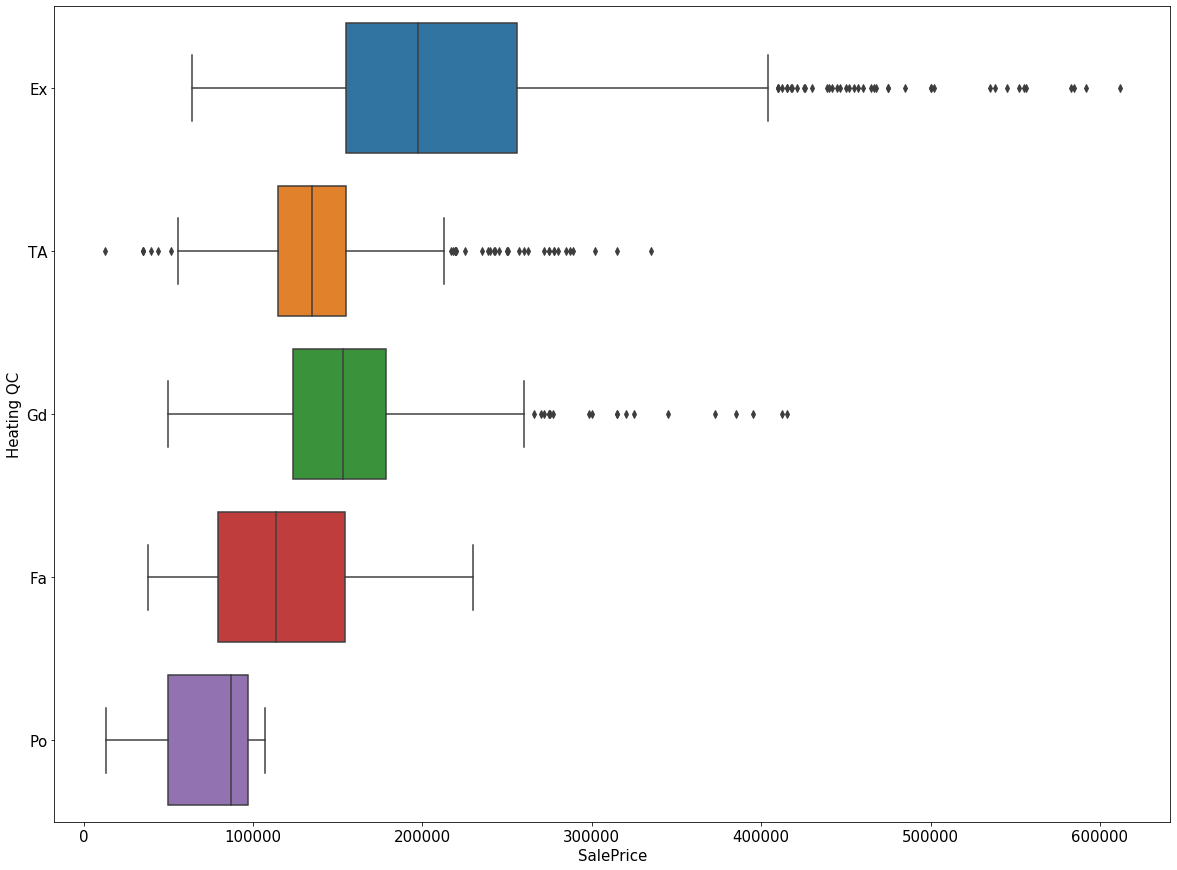

In [104]:
#Boxplot to depict relationship between Heating Quality and sale price 
boxplot(ames_df,x='SalePrice',y='Heating QC')

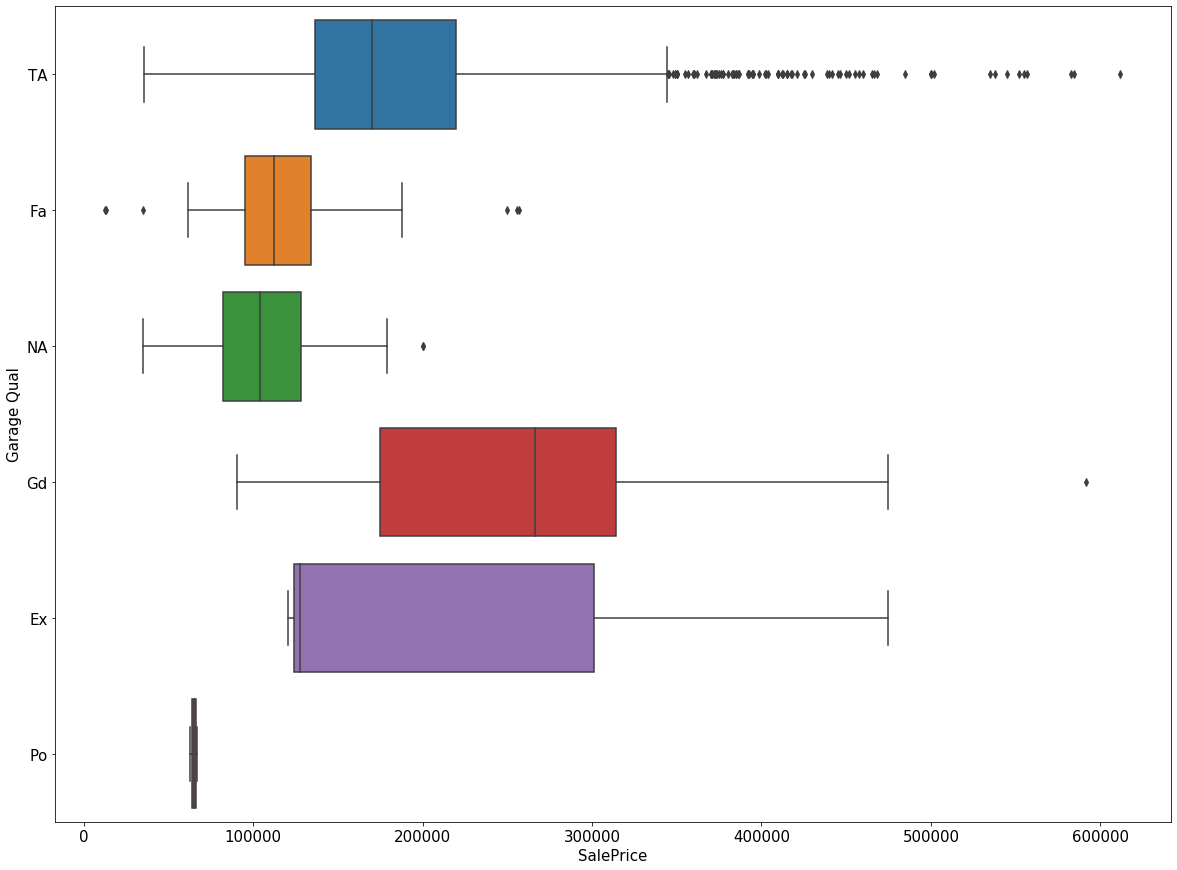

In [105]:
#Boxplot to depict relationship between Garage Quality and sale price 
boxplot(ames_df,x='SalePrice',y='Garage Qual')

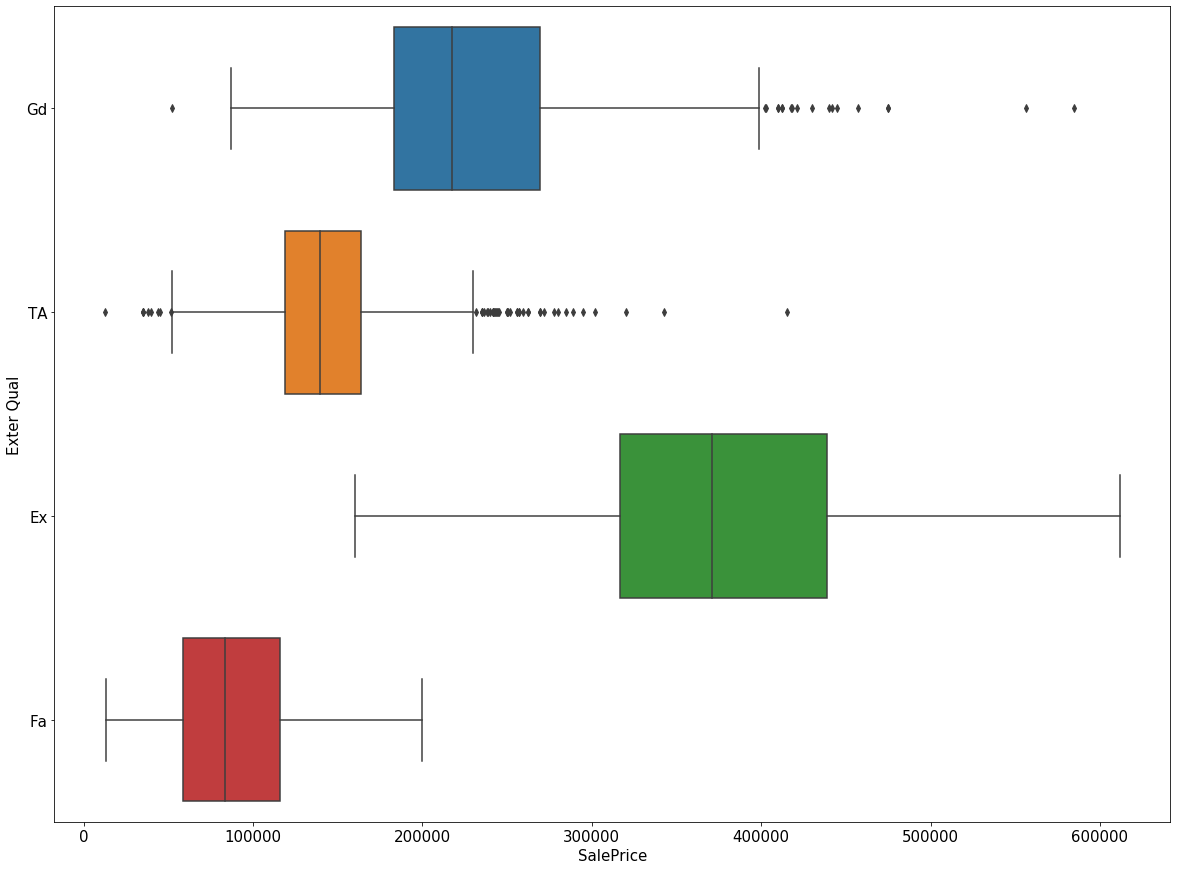

In [106]:
#Boxplot to depict relationship between Exterior Quality and sale price 
boxplot(ames_df,x='SalePrice',y='Exter Qual')

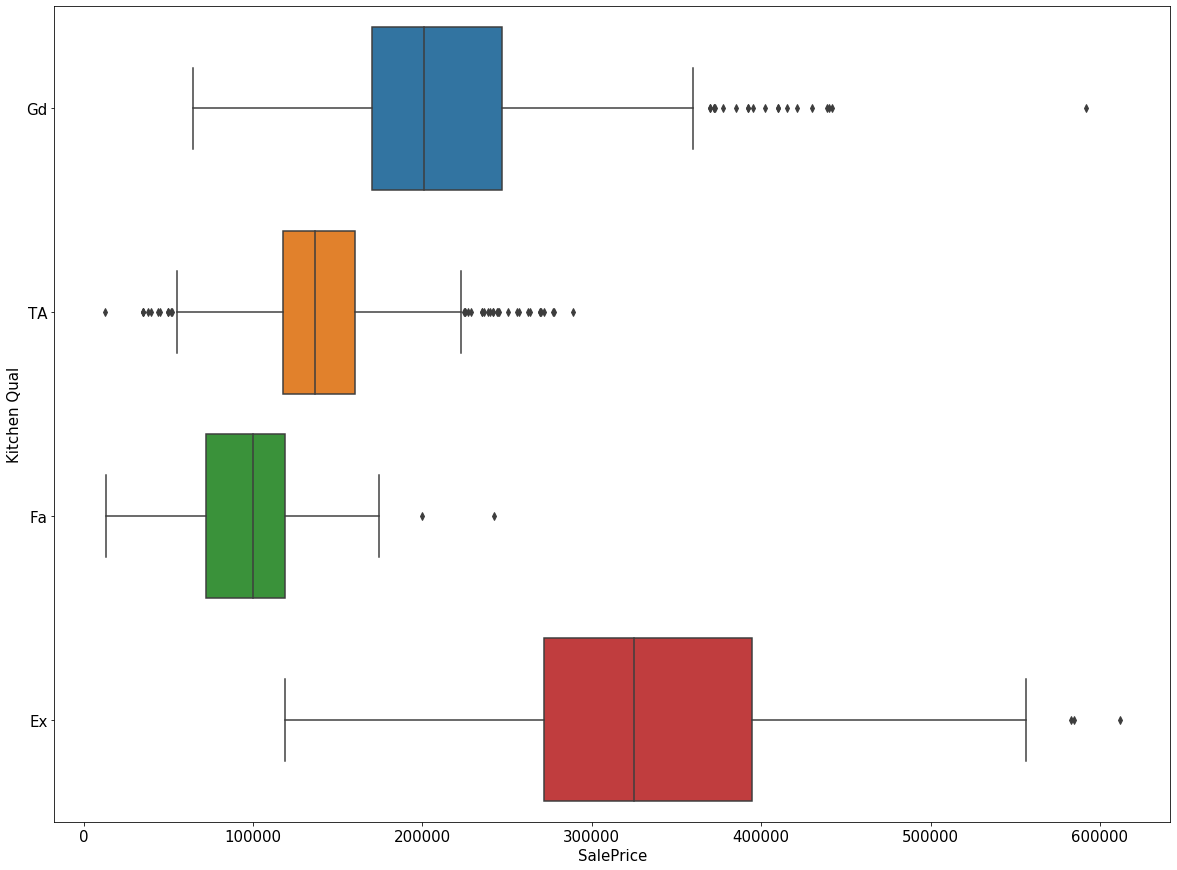

In [107]:
#Boxplot to depict relationship between Kitchen Quality and sale price 
boxplot(ames_df,x='SalePrice',y='Kitchen Qual')

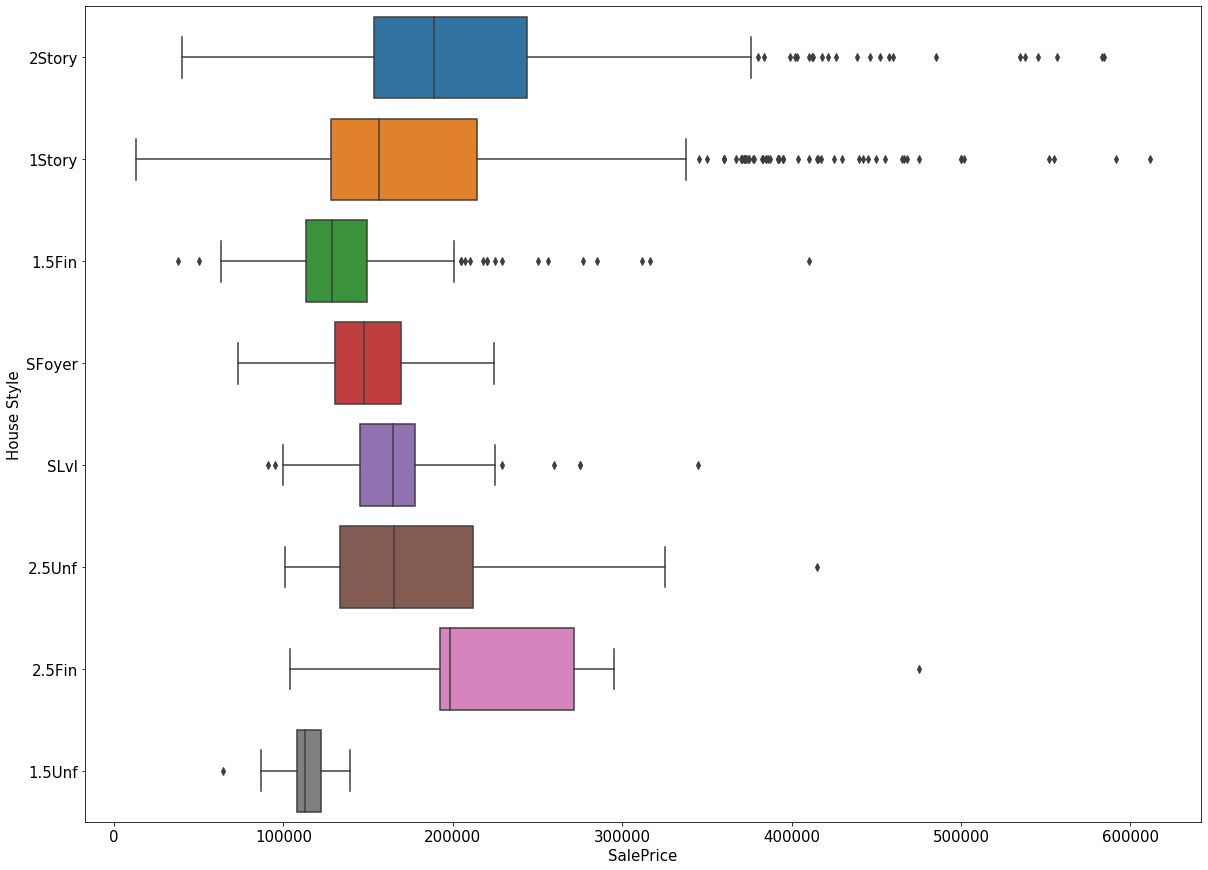

In [108]:
#Boxplot showing House Size and Sale Price
boxplot(ames_df,x='SalePrice',y='House Style')

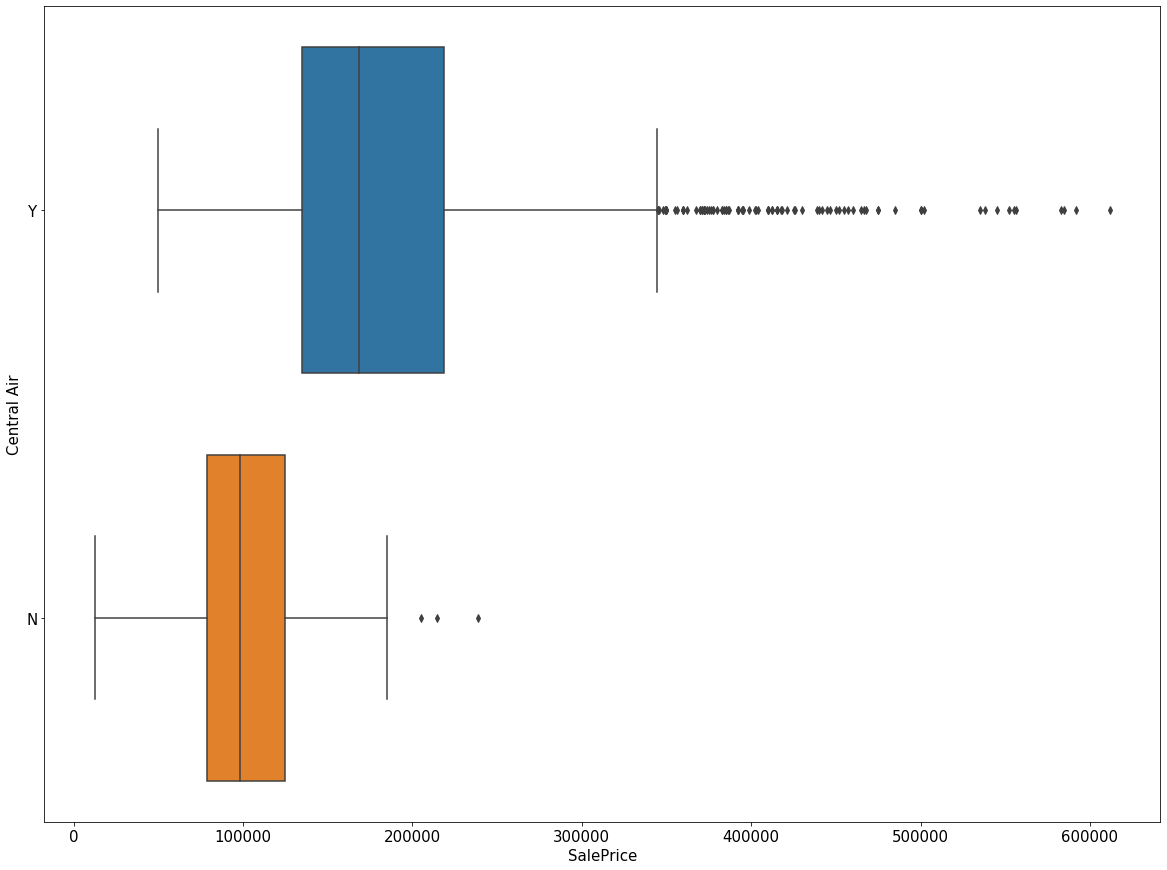

In [109]:
#Boxplot showing Cntral AC and Sale Price
boxplot(ames_df,x='SalePrice',y='Central Air')

In [338]:
ames_df[(ames_df['SalePrice']<30000)|(ames_df['SalePrice']>600000)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
183,1554,910251050,20,A (agr),80.0,14584,Pave,NA,3,Low,AllPub,4,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,TA,TA,No,Unf,0.0,Unf,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Sal,0,NA,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NA,NA,NA,0,2,2008,WD,13100
1628,182,902207130,30,RM,68.0,9656,Pave,NA,3,Lvl,AllPub,4,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,832,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928.0,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,0,NA,NA,NA,0,6,2010,WD,12789
1671,45,528150070,20,RL,100.0,12919,Pave,NA,0,Lvl,AllPub,4,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,2364,0,0,2364,1.0,0.0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3.0,820.0,TA,TA,Y,0,67,0,0,0,0,NA,NA,NA,0,3,2010,New,611657


In [339]:
#Dropping SalePrice Outlier Data
ames_df.drop([183,1628,1671],inplace=True)

Text(0, 0.5, 'SalePrice')

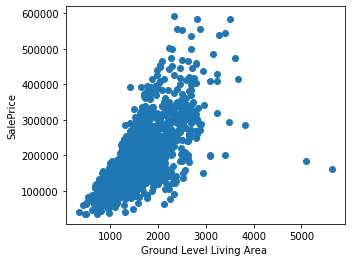

In [340]:
plt.figure(figsize=(5,4))
plt.scatter(x=ames_df['Gr Liv Area'],y=ames_df['SalePrice'])
plt.xlabel('Ground Level Living Area ')
plt.ylabel('SalePrice')

In [341]:
ames_df[(ames_df['Gr Liv Area']>5000)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NA,2,Bnk,AllPub,0,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NA,0,Bnk,AllPub,4,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NA,NA,Elev,17000,10,2007,New,183850


In [342]:
#Dropping SalePrice Outlier Data
ames_df.drop([960,1885],inplace=True)

Text(0, 0.5, 'SalePrice')

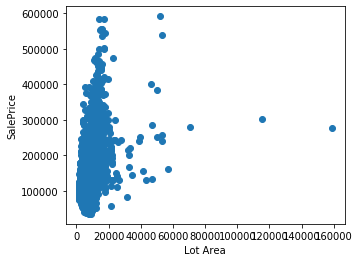

In [343]:
plt.figure(figsize=(5,4))
plt.scatter(x=ames_df['Lot Area'],y=ames_df['SalePrice'])
plt.xlabel('Lot Area')
plt.ylabel('SalePrice')

In [344]:
ames_df[(ames_df['Lot Area']>100000)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,2116,906426060,50,RL,520.3,159000,Pave,NA,1,Low,AllPub,1,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,NA,NA,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,388.8,115149,Pave,NA,1,Low,AllPub,1,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,0,0,NA,NA,NA,0,6,2007,WD,302000


In [345]:
#Dropping SalePrice Outlier Data
ames_df.drop([471,694],inplace=True)

Text(0, 0.5, 'SalePrice')

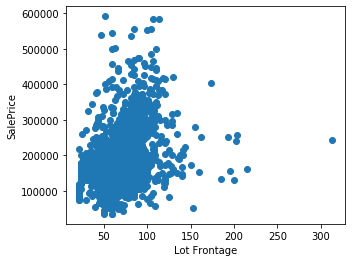

In [346]:
plt.figure(figsize=(5,4))
plt.scatter(x=ames_df['Lot Frontage'],y=ames_df['SalePrice'])
plt.xlabel('Lot Frontage')
plt.ylabel('SalePrice')

In [347]:
ames_df[(ames_df['Lot Frontage']>300)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1335,1266,535427070,20,RL,313.0,27650,Pave,NA,1,HLS,AllPub,4,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425.0,Unf,0.0,160.0,585.0,GasA,Ex,Y,SBrkr,2069,0,0,2069,1.0,0.0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2.0,505.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,11,2008,WD,242000


In [348]:
#Dropping SalePrice Outlier Data
ames_df.drop(index=1335,inplace=True)

In [349]:
ames_df.index=np.arange(0,len(ames_df['Id']))

In [350]:
ames_df

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,83.9,13517,Pave,NA,0,Lvl,AllPub,1,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,0,Lvl,AllPub,1,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,3,Lvl,AllPub,4,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,3,Lvl,AllPub,4,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,0,Lvl,AllPub,4,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,1587,921126030,20,RL,79.0,11449,Pave,NA,0,HLS,AllPub,4,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,NA,NA,NA,0,1,2008,WD,298751
2037,785,905377130,30,RL,80.4,12342,Pave,NA,0,Lvl,AllPub,4,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NA,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,NA,NA,NA,0,3,2009,WD,82500
2038,916,909253010,50,RL,57.0,7558,Pave,NA,3,Bnk,AllPub,4,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NA,NA,NA,0,3,2009,WD,177000
2039,639,535179160,20,RL,80.0,10400,Pave,NA,3,Lvl,AllPub,0,Gtl,NAmes,Norm

In [351]:
#Dummy Ordinal Categories

In [352]:
le.fit(ames_df['Street'])
ames_df['Street']=le.transform(ames_df['Street'])
le.fit(ames_df['Utilities'])
ames_df['Utilities']=le.transform(ames_df['Utilities'])
le.fit(ames_df["Exter Qual"])
ames_df["Exter Qual"]=le.transform(ames_df["Exter Qual"])
le.fit(ames_df["Exter Cond"])
ames_df["Exter Cond"]=le.transform(ames_df["Exter Cond"])
le.fit(ames_df["Bsmt Qual"])
ames_df["Bsmt Qual"]=le.transform(ames_df["Bsmt Qual"])
le.fit(ames_df["Bsmt Cond"])
ames_df["Bsmt Cond"]=le.transform(ames_df["Bsmt Cond"])
le.fit(ames_df["Bsmt Exposure"])
ames_df["Bsmt Exposure"]=le.transform(ames_df["Bsmt Exposure"])
le.fit(ames_df["BsmtFin Type 1"])
ames_df["BsmtFin Type 1"]=le.transform(ames_df["BsmtFin Type 1"])
le.fit(ames_df["BsmtFin Type 2"])
ames_df["BsmtFin Type 2"]=le.transform(ames_df["BsmtFin Type 2"])
le.fit(ames_df["Heating QC"])
ames_df["Heating QC"]=le.transform(ames_df["Heating QC"])
le.fit(ames_df["Heating"])
ames_df["Heating"]=le.transform(ames_df["Heating"])
le.fit(ames_df["Central Air"])
ames_df["Central Air"]=le.transform(ames_df["Central Air"])
le.fit(ames_df["Electrical"])
ames_df["Electrical"]=le.transform(ames_df["Electrical"])
le.fit(ames_df["Kitchen Qual"])
ames_df["Kitchen Qual"]=le.transform(ames_df["Kitchen Qual"])
le.fit(ames_df["Functional"])
ames_df["Functional"]=le.transform(ames_df["Functional"])
ames_df['MS SubClass']=ames_df['MS SubClass'].astype(int)
le.fit(ames_df["MS Zoning"])
ames_df["MS Zoning"]=le.transform(ames_df["MS Zoning"])
le.fit(ames_df["Fireplace Qu"])
ames_df["Fireplace Qu"]=le.transform(ames_df["Fireplace Qu"])
le.fit(ames_df["Garage Finish"])
ames_df["Garage Finish"]=le.transform(ames_df["Garage Finish"])
le.fit(ames_df["Garage Qual"])
ames_df["Garage Qual"]=le.transform(ames_df["Garage Qual"])
le.fit(ames_df["Garage Cond"])
ames_df["Garage Cond"]=le.transform(ames_df["Garage Cond"])
le.fit(ames_df["Paved Drive"])
ames_df["Paved Drive"]=le.transform(ames_df["Paved Drive"])
le.fit(ames_df["Pool QC"])
ames_df["Pool QC"]=le.transform(ames_df["Pool QC"])
le.fit(ames_df["Alley"])
ames_df["Alley"]=le.transform(ames_df["Alley"])
le.fit(ames_df["Land Contour"])
ames_df["Land Contour"]=le.transform(ames_df["Land Contour"])
le.fit(ames_df["Land Slope"])
ames_df["Land Slope"]=le.transform(ames_df["Land Slope"])
le.fit(ames_df["Neighborhood"])
ames_df["Neighborhood"]=le.transform(ames_df["Neighborhood"])
le.fit(ames_df["Condition 1"])
ames_df["Condition 1"]=le.transform(ames_df["Condition 1"])
le.fit(ames_df["Condition 2"])
ames_df["Condition 2"]=le.transform(ames_df["Condition 2"])
le.fit(ames_df["Bldg Type"])
ames_df["Bldg Type"]=le.transform(ames_df["Bldg Type"])
le.fit(ames_df["House Style"])
ames_df["House Style"]=le.transform(ames_df["House Style"])
le.fit(ames_df["Roof Style"])
ames_df["Roof Style"]=le.transform(ames_df["Roof Style"])
le.fit(ames_df["Roof Matl"])
ames_df["Roof Matl"]=le.transform(ames_df["Roof Matl"])
le.fit(ames_df["Exterior 1st"])
ames_df["Exterior 1st"]=le.transform(ames_df["Exterior 1st"])
le.fit(ames_df["Exterior 2nd"])
ames_df["Exterior 2nd"]=le.transform(ames_df["Exterior 2nd"])
le.fit(ames_df["Mas Vnr Type"])
ames_df["Mas Vnr Type"]=le.transform(ames_df["Mas Vnr Type"])
le.fit(ames_df["Foundation"])
ames_df["Foundation"]=le.transform(ames_df["Foundation"])
le.fit(ames_df["Garage Type"])
ames_df["Garage Type"]=le.transform(ames_df["Garage Type"])
le.fit(ames_df["Exterior 2nd"])
ames_df["Exterior 2nd"]=le.transform(ames_df["Exterior 2nd"])
le.fit(ames_df["Fence"])
ames_df["Fence"]=le.transform(ames_df["Fence"])
le.fit(ames_df["Misc Feature"])
ames_df["Misc Feature"]=le.transform(ames_df["Misc Feature"])
le.fit(ames_df["Sale Type"])
ames_df["Sale Type"]=le.transform(ames_df["Sale Type"])

In [353]:
ames_df.dtypes

Id                  object
PID                 object
MS SubClass          int32
MS Zoning            int32
Lot Frontage       float64
Lot Area             int64
Street               int32
Alley                int32
Lot Shape            int32
Land Contour         int32
Utilities            int32
Lot Config           int32
Land Slope           int32
Neighborhood         int32
Condition 1          int32
Condition 2          int32
Bldg Type            int32
House Style          int32
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style           int32
Roof Matl            int32
Exterior 1st         int32
Exterior 2nd         int64
Mas Vnr Type         int32
Mas Vnr Area       float64
Exter Qual           int32
Exter Cond           int32
Foundation           int32
Bsmt Qual            int32
Bsmt Cond            int32
Bsmt Exposure        int32
BsmtFin Type 1       int32
BsmtFin SF 1       float64
BsmtFin Type 2       int32
B

In [354]:
ames_df.corr()['SalePrice'].sort_values(ascending=False).head(20)

SalePrice         1.000000
Overall Qual      0.804078
Gr Liv Area       0.719475
Total Bsmt SF     0.662361
Garage Area       0.659788
Garage Cars       0.651641
1st Flr SF        0.645140
Year Built        0.573797
Garage Yr Blt     0.558021
Year Remod/Add    0.550209
Full Bath         0.538897
TotRms AbvGrd     0.505945
Mas Vnr Area      0.505661
Fireplaces        0.470893
BsmtFin SF 1      0.438439
Foundation        0.425019
Lot Area          0.354236
Lot Frontage      0.342424
Open Porch SF     0.339467
Wood Deck SF      0.331063
Name: SalePrice, dtype: float64

In [355]:
for a in range(0,len(ames_df.corr().index)):
    for b in range(0,len(ames_df.corr().columns)):
        if (ames_df.corr().iloc[a,b] > 0.8) and (ames_df.corr().iloc[a,b] < 1.00):
            print("Correlation:", ames_df.corr().index[a], ames_df.corr().columns[b], ames_df.corr().iloc[a,b])

Correlation: Overall Qual SalePrice 0.8040775522632805
Correlation: Year Built Garage Yr Blt 0.8567311681936914
Correlation: Exterior 1st Exterior 2nd 0.8553371232906992
Correlation: Exterior 2nd Exterior 1st 0.8553371232906992
Correlation: Gr Liv Area TotRms AbvGrd 0.8122304793496299
Correlation: TotRms AbvGrd Gr Liv Area 0.8122304793496299
Correlation: Garage Yr Blt Year Built 0.8567311681936914
Correlation: Garage Cars Garage Area 0.8974469812764944
Correlation: Garage Area Garage Cars 0.8974469812764944
Correlation: SalePrice Overall Qual 0.8040775522632805


In [356]:
#Combine Columns based on high correlation combination 
ames_df['Garage_attr']=ames_df['Garage Area']*ames_df['Garage Cars']
ames_df['Year_attr']=ames_df['Year Built']*ames_df['Garage Yr Blt']
ames_df['Exterior_attr']=ames_df['Exterior 1st']*ames_df['Exterior 2nd']
ames_df['Total_SF']=ames_df['Total Bsmt SF']*ames_df['1st Flr SF']
ames_df['Total_Grd_attr']=ames_df['TotRms AbvGrd']*ames_df['Gr Liv Area']
ames_df['House Age']=2010-ames_df['Year Built']
ames_df.drop(['Garage Area','Garage Cars','Year Built','Garage Yr Blt','Exterior 1st','Exterior 2nd','Total Bsmt SF','1st Flr SF','TotRms AbvGrd','Gr Liv Area'],axis=1,inplace=True)

In [357]:
#CHeck for polynomial variables
#Instantiate PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
#initiate
poly=PolynomialFeatures(include_bias=False)

In [358]:
X=ames_df[['Overall Qual','Garage_attr','Year_attr','Exterior_attr','Total_SF','Total_Grd_attr','Year Remod/Add','Full Bath','House Age']]
y=ames_df['SalePrice']

In [359]:
X_poly=poly.fit_transform(X)

In [360]:
poly_df=(pd.DataFrame(X_poly,columns=poly.get_feature_names(['Overall Qual','Garage_attr','Year_attr','Exterior_attr','Total_SF','Total_Grd_attr','Year Remod/Add','Full Bath','House Age'])))
poly_df['SalePrice']=ames_df['SalePrice']
poly_df.head()

,Overall Qual,Garage_attr,Year_attr,Exterior_attr,Total_SF,Total_Grd_attr,Year Remod/Add,Full Bath,House Age,Overall Qual^2,Overall Qual Garage_attr,Overall Qual Year_attr,Overall Qual Exterior_attr,Overall Qual Total_SF,Overall Qual Total_Grd_attr,Overall Qual Year Remod/Add,Overall Qual Full Bath,Overall Qual House Age,Garage_attr^2,Garage_attr Year_attr,Garage_attr Exterior_attr,Garage_attr Total_SF,Garage_attr Total_Grd_attr,Garage_attr Year Remod/Add,Garage_attr Full Bath,Garage_attr House Age,Year_attr^2,Year_attr Exterior_attr,Year_attr Total_SF,Year_attr Total_Grd_attr,Year_attr Year Remod/Add,Year_attr Full Bath,Year_attr House Age,Exterior_attr^2,Exterior_attr Total_SF,Exterior_attr Total_Grd_attr,Exterior_attr Year Remod/Add,Exterior_attr Full Bath,Exterior_attr House Age,Total_SF^2,Total_SF Total_Grd_attr,Total_SF Year Remod/Add,Total_SF Full Bath,Total_SF House Age,Total_Grd_attr^2,Total_Grd_attr Year Remod/Add,Total_Grd_attr Full Bath,Total_Grd_attr House Age,Year Remod/Add^2,Year Remod/Add Full Bath,Year Remod/Add House Age,Full Bath^2,Full Bath House Age,House Age^2,SalePrice
0,6.0,950.0,3904576.0,54.0,525625.0,8874.0,2005.0,2.0,34.0,36.0,5700.0,23427456.0,324.0,3153750.0,53244.0,12030.0,12.0,204.0,902500.0,3.709347e+09,51300.0,499343750.0,8430300.0,1904750.0,1900.0,32300.0,1.524571e+13,210847104.0,2.052343e+12,3.464921e+10,7.828675e+09,7809152.0,132755584.0,2916.0,28383750.0,479196.0,108270.0,108.0,1836.0,2.762816e+11,4.664396e+09,1.053878e+09,1051250.0,17871250.0,78747876.0,17792370.0,17748.0,301716.0,4020025.0,4010.0,68170.0,4.0,68.0,1156.0,130500
1,7.0,1118.0,3986012.0,144.0,833569.0,16976.0,1997.0,2.0,14.0,49.0,7826.0,27902084.0,1008.0,5834983.0,118832.0,13979.0,14.0,98.0,1249924.0,4.456361e+09,160992.0,931930142.0,18979168.0,2232646.0,2236.0,15652.0,1.588829e+13,573985728.0,3.322616e+12,6.766654e+10,7.960066e+09,7972024.0,55804168.0,20736.0,120033936.0,2444544.0,287568.0,288.0,2016.0,6.948373e+11,1.415067e+10,1.664637e+09,1667138.0,11669966.0,288184576.0,33901072.0,33952.0,237664.0,3988009.0,3994.0,27958.0,4.0,28.0,196.0,220000
2,5.0,246.0,3814209.0,144.0,1117249.0,5285.0,2007.0,1.0,57.0,25.0,1230.0,19071045.0,720.0,5586245.0,26425.0,10035.0,5.0,285.0,60516.0,9.382954e+08,35424.0,274843254.0,1300110.0,493722.0,246.0,14022.0,1.454819e+13,549246096.0,4.261421e+12,2.015809e+10,7.655117e+09,3814209.0,217409913.0,20736.0,160883856.0,761040.0,289008.0,144.0,8208.0,1.248245e+12,5.904661e+09,2.242319e+09,1117249.0,63683193.0,27931225.0,10606995.0,5285.0,301245.0,4028049.0,2007.0,114399.0,1.0,57.0,3249.0,109000
3,5.0,800.0,4026042.0,144.0,285696.0,10108.0,2007.0,2.0,4.0,25.0,4000.0,20130210.0,720.0,1428480.0,50540.0,10035.0,10.0,20.0,640000.0,3.220834e+09,115200.0,228556800.0,8086400.0,1605600.0,1600.0,3200.0,1.620901e+13,579750048.0,1.150224e+12,4.069523e+10,8.080266e+09,8052084.0,16104168.0,20736.0,41140224.0,1455552.0,289008.0,288.0,576.0,8.162220e+10,2.887815e+09,5.733919e+08,571392.0,1142784.0,102171664.0,20286756.0,20216.0,40432.0,4028049.0,4014.0,8028.0,4.0,8.0,16.0,174000
4,6.0,968.0,3718300.0,117.0,561756.0,8670.0,1993.0,2.0,110.0,36.0,5808.0,22309800.0,702.0,3370536.0,52020.0,11958.0,12.0,660.0,937024.0,3.599314e+09,113256.0,543779808.0,8392560.0,1929224.0,1936.0,106480.0,1.382575e+13,435041100.0,2.088777e+12,3.223766e+10,7.410572e+09,7436600.0,409013000.0,13689.0,65725452.0,1014390.0,233181.0,234.0,12870.0,3.155698e+11,4.870425e+09,1.119580e+09,1123512.0,61793160.0,75168900.0,17279310.0,17340.0,953700.0,3972049.0,3986.0,219230.0,4.0,220.0,12100.0,138500


In [205]:
for a in range(0,len(poly_df.corr().index)):
    for b in range(0,len(poly_df.corr().columns)):
        if (poly_df.corr().iloc[a,b] > 0.9998) and (poly_df.corr().iloc[a,b] < 1.00):
            print("Correlation:", poly_df.corr().index[a], poly_df.corr().columns[b], poly_df.corr().iloc[a,b])

Correlation: Garage_attr Garage_attr Year Remod/Add 0.9999005314373643
Correlation: Year_attr Year_attr^2 0.9998861086824867
Correlation: Total_SF Total_SF Year Remod/Add 0.9998991774325605
Correlation: Total_Grd_attr Total_Grd_attr Year Remod/Add 0.999826081108744
Correlation: Year Remod/Add Year Remod/Add^2 0.9999938373999159
Correlation: House Age Year Remod/Add House Age 0.9998428109866384
Correlation: Garage_attr Year Remod/Add Garage_attr 0.9999005314373643
Correlation: Year_attr^2 Year_attr 0.9998861086824867
Correlation: Total_SF Year Remod/Add Total_SF 0.9998991774325605
Correlation: Total_Grd_attr Year Remod/Add Total_Grd_attr 0.999826081108744
Correlation: Year Remod/Add^2 Year Remod/Add 0.9999938373999159
Correlation: Year Remod/Add House Age House Age 0.9998428109866384


In [206]:
ames_df['Year_attr_squared']=ames_df['Year_attr']**2

In [207]:
ames_df['Year_Remod/Add_squared']=ames_df['Year Remod/Add']**2

In [208]:
ames_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage_attr,Year_attr,Exterior_attr,Total_SF,Total_Grd_attr,House Age,Year_attr_squared,Year_Remod/Add_squared
0,109,533352170,60,5,83.9,13517,1,1,0,3,0,1,0,22,5,2,0,5,6,8,2005,1,0,1,289.0,2,4,1,4,4,3,2,533.0,5,0.0,192.0,0,0,1,4,754,0,0.0,0.0,2,1,3,1,2,7,0,3,1,2,5,5,2,0,44,0,0,0,0,3,4,1,0,3,2010,8,130500,950.0,3904576.0,54,525625.0,8874,34,1.524571e+13,4020025
1,544,531379050,60,5,43.0,11492,1,1,0,3,0,1,0,23,2,2,0,5,7,5,1997,1,0,1,132.0,2,4,2,2,4,3,2,637.0,5,0.0,276.0,0,0,1,4,1209,0,1.0,0.0,2,1,4,1,2,7,1,5,1,2,5,5,2,0,74,0,0,0,0,3,4,1,0,4,2009,8,220000,1118.0,3986012.0,144,833569.0,16976,14,1.588829e+13,3988009
2,153,535304180,20,5,68.0,7922,1,1,3,3,0,4,0,15,2,2,0,2,5,7,2007,1,0,2,0.0,3,2,1,4,4,3,2,731.0,5,0.0,326.0,0,4,1,4,0,0,1.0,0.0,1,0,3,1,2,7,0,3,5,3,5,5,2,0,52,0,0,0,0,3,4,1,0,1,2010,8,109000,246.0,3814209.0,144,1117249.0,5285,57,1.454819e+13,4028049
3,318,916386060,60,5,73.0,9802,1,1,3,3,0,4,0,26,2,2,0,5,5,5,2007,1,0,2,0.0,3,4,2,2,4,3,5,0.0,5,0.0,384.0,0,2,1,4,700,0,0.0,0.0,2,1,3,1,3,7,0,3,3,0,5,5,2,100,0,0,0,0,0,3,4,1,0,4,2010,8,174000,800.0,4026042.0,144,285696.0,10108,4,1.620901e+13,4028049
4,255,906425045,50,5,82.0,14235,1,1,0,3,0,4,0,23,2,2,0,0,6,8,1993,1,0,2,0.0,3,4,2,1,2,3,5,0.0,5,0.0,676.0,0,4,1,4,614,0,0.0,0.0,2,0,3,1,3,7,0,3,5,3,5,5,0,0,59,0,0,0,0,3,4,1,0,3,2010,8,138500,968.0,3718300.0,117,561756.0,8670,110,1.382575e+13,3972049


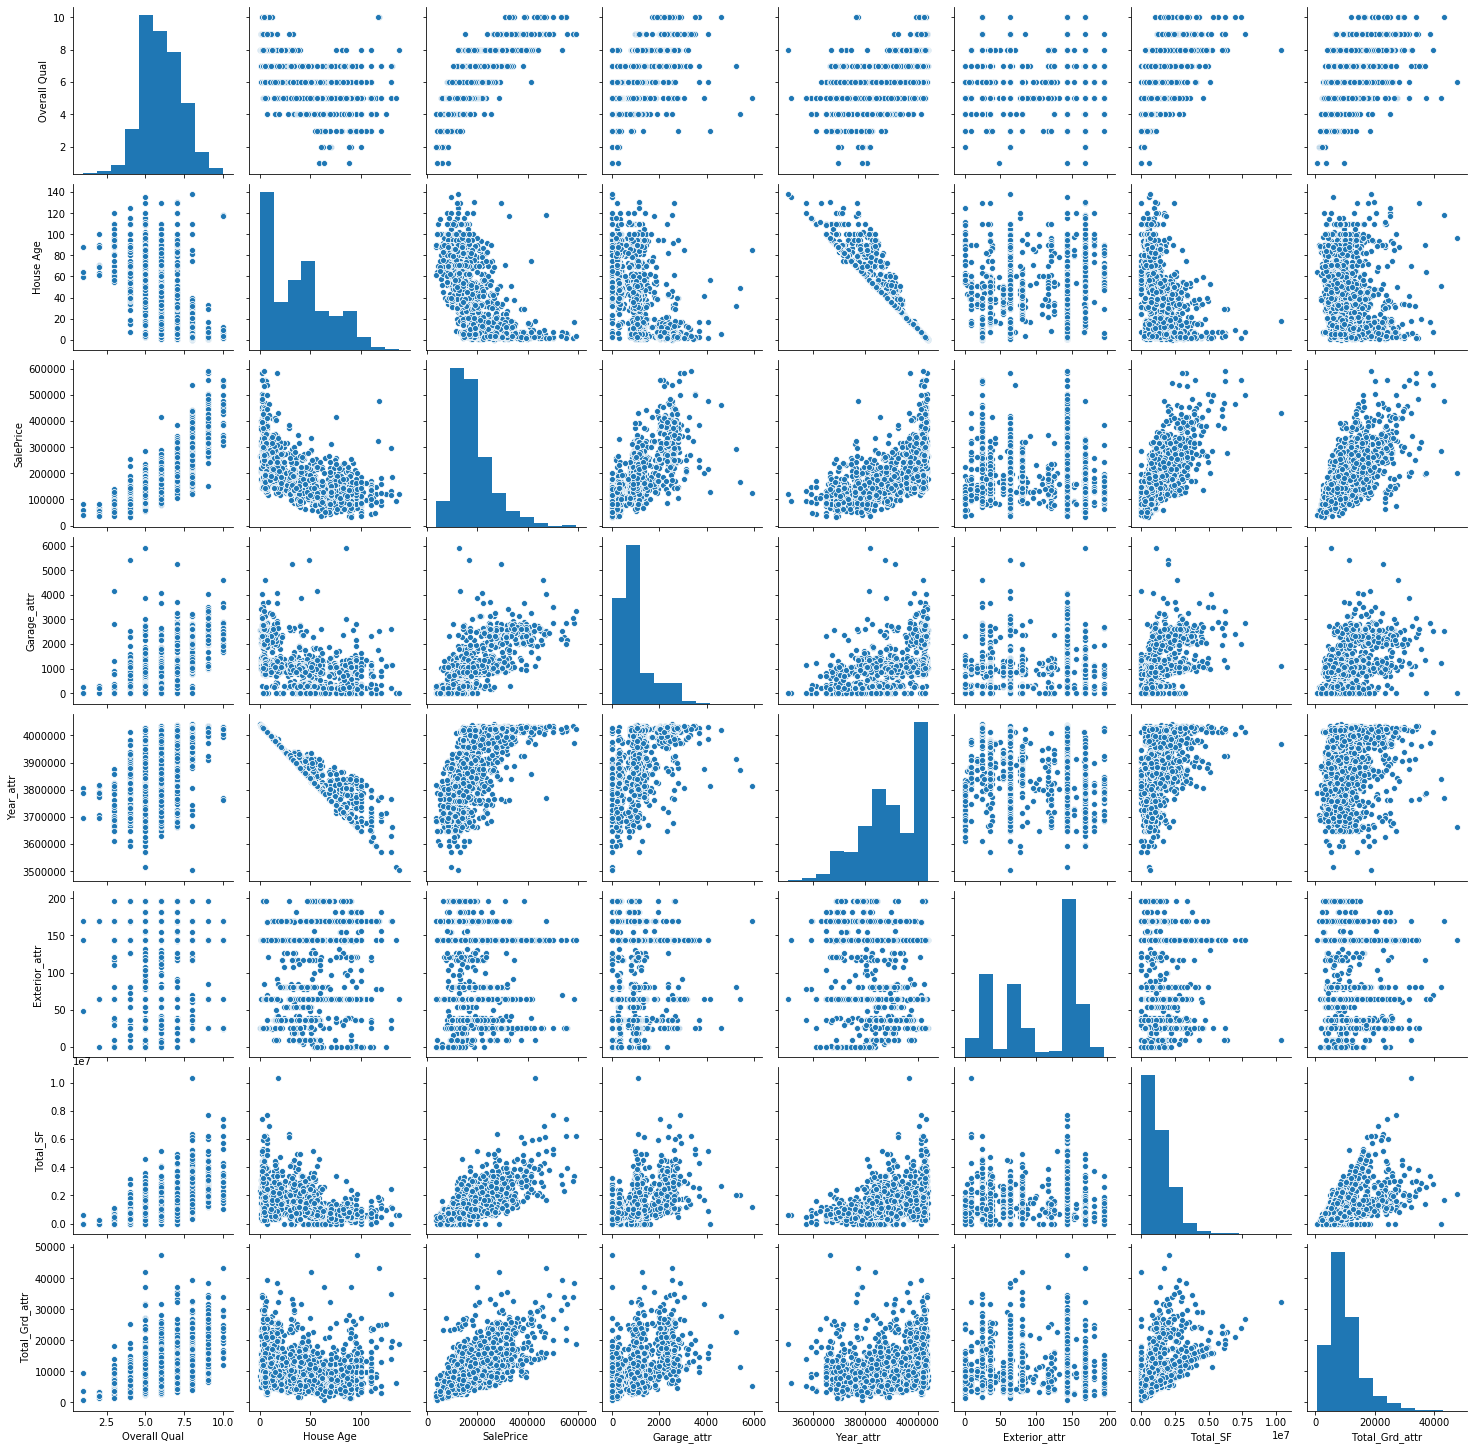

In [265]:
#Pairplot to visualize significant features
sns.pairplot(ames_df[['Overall Qual','House Age','SalePrice','Garage_attr','Year_attr','Exterior_attr','Total_SF','Total_Grd_attr']])

## Scale Data Appropriately

In [209]:
X=ames_df.drop(['Id','PID','SalePrice'],axis=1)

In [210]:
X.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Garage_attr,Year_attr,Exterior_attr,Total_SF,Total_Grd_attr,House Age,Year_attr_squared,Year_Remod/Add_squared
0,60,5,83.9,13517,1,1,0,3,0,1,0,22,5,2,0,5,6,8,2005,1,0,1,289.0,2,4,1,4,4,3,2,533.0,5,0.0,192.0,0,0,1,4,754,0,0.0,0.0,2,1,3,1,2,7,0,3,1,2,5,5,2,0,44,0,0,0,0,3,4,1,0,3,2010,8,950.0,3904576.0,54,525625.0,8874,34,1.524571e+13,4020025
1,60,5,43.0,11492,1,1,0,3,0,1,0,23,2,2,0,5,7,5,1997,1,0,1,132.0,2,4,2,2,4,3,2,637.0,5,0.0,276.0,0,0,1,4,1209,0,1.0,0.0,2,1,4,1,2,7,1,5,1,2,5,5,2,0,74,0,0,0,0,3,4,1,0,4,2009,8,1118.0,3986012.0,144,833569.0,16976,14,1.588829e+13,3988009
2,20,5,68.0,7922,1,1,3,3,0,4,0,15,2,2,0,2,5,7,2007,1,0,2,0.0,3,2,1,4,4,3,2,731.0,5,0.0,326.0,0,4,1,4,0,0,1.0,0.0,1,0,3,1,2,7,0,3,5,3,5,5,2,0,52,0,0,0,0,3,4,1,0,1,2010,8,246.0,3814209.0,144,1117249.0,5285,57,1.454819e+13,4028049
3,60,5,73.0,9802,1,1,3,3,0,4,0,26,2,2,0,5,5,5,2007,1,0,2,0.0,3,4,2,2,4,3,5,0.0,5,0.0,384.0,0,2,1,4,700,0,0.0,0.0,2,1,3,1,3,7,0,3,3,0,5,5,2,100,0,0,0,0,0,3,4,1,0,4,2010,8,800.0,4026042.0,144,285696.0,10108,4,1.620901e+13,4028049
4,50,5,82.0,14235,1,1,0,3,0,4,0,23,2,2,0,0,6,8,1993,1,0,2,0.0,3,4,2,1,2,3,5,0.0,5,0.0,676.0,0,4,1,4,614,0,0.0,0.0,2,0,3,1,3,7,0,3,5,3,5,5,0,0,59,0,0,0,0,3,4,1,0,3,2010,8,968.0,3718300.0,117,561756.0,8670,110,1.382575e+13,3972049


In [211]:
sc=StandardScaler()
sc.fit(X)
X_scaled=sc.transform(X)

In [212]:
X_scaled

array([[ 0.06703664,  0.04867435,  0.62602247, ..., -0.14130756,
         0.0463722 ,  0.99415965],
       [ 0.06703664,  0.04867435, -1.24653563, ..., -0.80439237,
         0.81808826,  0.60933782],
       [-0.86610431,  0.04867435, -0.10194021, ...,  0.62123997,
        -0.79133172,  1.0906055 ],
       ...,
       [-0.16624859,  0.04867435, -0.6055622 , ...,  1.45009598,
        -1.65170126, -1.62041959],
       [-0.86610431,  0.04867435,  0.44746559, ...,  0.52177725,
        -0.68372974, -1.33872655],
       [ 0.06703664,  0.04867435, -0.46821075, ..., -0.9038551 ,
         0.9138443 ,  0.70539904]])

In [213]:
X_scaled_ames_df=pd.DataFrame(list(X_scaled))

In [214]:
X_scaled_ames_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,0.067037,0.048674,0.626022,0.693551,0.058664,0.056211,-1.364955,0.312164,-0.02971,-1.297020,-0.212484,1.053894,3.389782,-0.010062,-0.422705,1.048714,-0.079344,2.210775,0.991886,-0.489062,-0.103201,-1.275594,1.119186,-0.732680,0.381066,-0.542913,0.981073,0.283715,0.622431,-0.443274,0.219011,0.317032,-0.291425,-0.845099,-0.10611,-0.867378,0.270335,0.308106,0.996727,-0.108244,-0.817319,-0.250455,0.770396,1.254478,0.187950,-0.20509,-0.409943,0.255575,-0.926449,-0.047907,-0.761697,0.113485,0.323302,0.290107,0.309910,-0.730805,-0.050142,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-1.176477,1.695435,0.31513,-0.048866,0.059785,-0.884319,-0.829150,-0.232432,-0.141308,0.046372,0.994160
1,0.067037,0.048674,-1.246536,0.306274,0.058664,0.056211,-1.364955,0.312164,-0.02971,-1.297020,-0.212484,1.193978,-0.042604,-0.010062,-0.422705,1.048714,0.627823,-0.510692,0.611209,-0.489062,-0.103201,-1.275594,0.202374,-0.732680,0.381066,0.856185,-0.546288,0.283715,0.622431,-0.443274,0.456355,0.317032,-0.291425,-0.656433,-0.10611,-0.867378,0.270335,0.308106,2.065571,-0.108244,1.100093,-0.250455,0.770396,1.254478,1.398066,-0.20509,-0.409943,0.255575,0.650601,1.698148,-0.761697,0.113485,0.323302,0.290107,0.309910,-0.730805,0.404968,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-0.811666,0.933572,0.31513,0.179225,0.816736,0.775185,-0.519063,1.166916,-0.804392,0.818088,0.609338
2,-0.866104,0.048674,-0.101940,-0.376480,0.058664,0.056211,0.754117,0.312164,-0.02971,0.584888,-0.212484,0.073302,-0.042604,-0.010062,-0.422705,-0.526286,-0.786511,1.303619,1.087056,-0.489062,-0.103201,0.402992,-0.568450,0.676745,-2.198556,-0.542913,0.981073,0.283715,0.622431,-0.443274,0.670877,0.317032,-0.291425,-0.544133,-0.10611,1.428011,0.270335,0.308106,-0.774502,-0.108244,1.100093,-0.250455,-1.049486,-0.741149,0.187950,-0.20509,-0.409943,0.255575,-0.926449,-0.047907,1.309753,0.946664,0.323302,0.290107,0.309910,-0.730805,0.071221,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-1.906100,1.695435,0.31513,-1.004676,-0.780180,0.775185,-0.233409,-0.852312,0.621240,-0.791332,1.090605
3,0.067037,0.048674,0.126979,-0.016934,0.058664,0.056211,0.754117,0.312164,-0.02971,0.584888,-0.212484,1.614231,-0.042604,-0.010062,-0.422705,1.048714,-0.786511,-0.510692,1.087056,-0.489062,-0.103201,0.402992,-0.568450,0.676745,0.381066,0.856185,-0.546288,0.283715,0.622431,1.204672,-0.997377,0.317032,-0.291425,-0.413864,-0.10611,0.280316,0.270335,0.308106,0.869875,-0.108244,-0.817319,-0.250455,0.770396,1.254478,0.187950,-0.20509,0.780232,0.255575,-0.926449,-0.047907,0.274028,-1.552871,0.323302,0.290107,0.309910,0.049555,-0.717636,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-0.811666,1.695435,0.31513,-0.252519,1.188816,0.775185,-1.070749,-0.019300,-1.135935,1.203266,1.090605
4,-0.166249,0.048674,0.539033,0.830867,0.058664,0.056211,-1.364955,0.312164,-0.02971,0.584888,-0.212484,1.193978,-0.042604,-0.010062,-0.422705,-1.576286,-0.079344,2.210775,0.420871,-0.489062,-0.103201,0.402992,-0.568450,0.676745,0.381066,0.856185,-1.309968,-2.708857,0.622431,1.204672,-0.997377,0.317032,-0.291425,0.241973,-0.10611,1.428011,0.270335,0.308106,0.667851,-0.108244,-0.817319,-0.250455,0.770396,-0.741149,0.187950,-0.20509,0.780232,0.255575,-0.926449,-0.047907,1.309753,0.946664,0.323302,0.290107,-3.443955,-0.730805,0.177413,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-1.176477,1.695435,0.31513,-0.024428,-1.671657,0.277334,-0.792768,-0.267667,2.378415,-1.658954,0.417504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [215]:
train_modified=X_scaled_ames_df

In [216]:
train_modified.columns=list(X.columns)

In [217]:
train_modified

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Garage_attr,Year_attr,Exterior_attr,Total_SF,Total_Grd_attr,House Age,Year_attr_squared,Year_Remod/Add_squared
0,0.067037,0.048674,0.626022,0.693551,0.058664,0.056211,-1.364955,0.312164,-0.02971,-1.297020,-0.212484,1.053894,3.389782,-0.010062,-0.422705,1.048714,-0.079344,2.210775,0.991886,-0.489062,-0.103201,-1.275594,1.119186,-0.732680,0.381066,-0.542913,0.981073,0.283715,0.622431,-0.443274,0.219011,0.317032,-0.291425,-0.845099,-0.10611,-0.867378,0.270335,0.308106,0.996727,-0.108244,-0.817319,-0.250455,0.770396,1.254478,0.187950,-0.20509,-0.409943,0.255575,-0.926449,-0.047907,-0.761697,0.113485,0.323302,0.290107,0.309910,-0.730805,-0.050142,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-1.176477,1.695435,0.31513,-0.048866,0.059785,-0.884319,-0.829150,-0.232432,-0.141308,0.046372,0.994160
1,0.067037,0.048674,-1.246536,0.306274,0.058664,0.056211,-1.364955,0.312164,-0.02971,-1.297020,-0.212484,1.193978,-0.042604,-0.010062,-0.422705,1.048714,0.627823,-0.510692,0.611209,-0.489062,-0.103201,-1.275594,0.202374,-0.732680,0.381066,0.856185,-0.546288,0.283715,0.622431,-0.443274,0.456355,0.317032,-0.291425,-0.656433,-0.10611,-0.867378,0.270335,0.308106,2.065571,-0.108244,1.100093,-0.250455,0.770396,1.254478,1.398066,-0.20509,-0.409943,0.255575,0.650601,1.698148,-0.761697,0.113485,0.323302,0.290107,0.309910,-0.730805,0.404968,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-0.811666,0.933572,0.31513,0.179225,0.816736,0.775185,-0.519063,1.166916,-0.804392,0.818088,0.609338
2,-0.866104,0.048674,-0.101940,-0.376480,0.058664,0.056211,0.754117,0.312164,-0.02971,0.584888,-0.212484,0.073302,-0.042604,-0.010062,-0.422705,-0.526286,-0.786511,1.303619,1.087056,-0.489062,-0.103201,0.402992,-0.568450,0.676745,-2.198556,-0.542913,0.981073,0.283715,0.622431,-0.443274,0.670877,0.317032,-0.291425,-0.544133,-0.10611,1.428011,0.270335,0.308106,-0.774502,-0.108244,1.100093,-0.250455,-1.049486,-0.741149,0.187950,-0.20509,-0.409943,0.255575,-0.926449,-0.047907,1.309753,0.946664,0.323302,0.290107,0.309910,-0.730805,0.071221,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-1.906100,1.695435,0.31513,-1.004676,-0.780180,0.775185,-0.233409,-0.852312,0.621240,-0.791332,1.090605
3,0.067037,0.048674,0.126979,-0.016934,0.058664,0.056211,0.754117,0.312164,-0.02971,0.584888,-0.212484,1.614231,-0.042604,-0.010062,-0.422705,1.048714,-0.786511,-0.510692,1.087056,-0.489062,-0.103201,0.402992,-0.568450,0.676745,0.381066,0.856185,-0.546288,0.283715,0.622431,1.204672,-0.997377,0.317032,-0.291425,-0.413864,-0.10611,0.280316,0.270335,0.308106,0.869875,-0.108244,-0.817319,-0.250455,0.770396,1.254478,0.187950,-0.20509,0.780232,0.255575,-0.926449,-0.047907,0.274028,-1.552871,0.323302,0.290107,0.309910,0.049555,-0.717636,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-0.811666,1.695435,0.31513,-0.252519,1.188816,0.775185,-1.070749,-0.019300,-1.135935,1.203266,1.090605
4,-0.166249,0.048674,0.539033,0.830867,0.058664,0.056211,-1.364955,0.312164,-0.02971,0.584888,-0.212484,1.193978,-0.042604,-0.010062,-0.422705,-1.576286,-0.079344,2.210775,0.420871,-0.489062,-0.103201,0.402992,-0.568450,0.676745,0.381

In [218]:
train_modified[['Id','PID','SalePrice']]=ames_df[['Id','PID','SalePrice']]

In [219]:
train_modified

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Garage_attr,Year_attr,Exterior_attr,Total_SF,Total_Grd_attr,House Age,Year_attr_squared,Year_Remod/Add_squared,Id,PID,SalePrice
0,0.067037,0.048674,0.626022,0.693551,0.058664,0.056211,-1.364955,0.312164,-0.02971,-1.297020,-0.212484,1.053894,3.389782,-0.010062,-0.422705,1.048714,-0.079344,2.210775,0.991886,-0.489062,-0.103201,-1.275594,1.119186,-0.732680,0.381066,-0.542913,0.981073,0.283715,0.622431,-0.443274,0.219011,0.317032,-0.291425,-0.845099,-0.10611,-0.867378,0.270335,0.308106,0.996727,-0.108244,-0.817319,-0.250455,0.770396,1.254478,0.187950,-0.20509,-0.409943,0.255575,-0.926449,-0.047907,-0.761697,0.113485,0.323302,0.290107,0.309910,-0.730805,-0.050142,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-1.176477,1.695435,0.31513,-0.048866,0.059785,-0.884319,-0.829150,-0.232432,-0.141308,0.046372,0.994160,109,533352170,130500
1,0.067037,0.048674,-1.246536,0.306274,0.058664,0.056211,-1.364955,0.312164,-0.02971,-1.297020,-0.212484,1.193978,-0.042604,-0.010062,-0.422705,1.048714,0.627823,-0.510692,0.611209,-0.489062,-0.103201,-1.275594,0.202374,-0.732680,0.381066,0.856185,-0.546288,0.283715,0.622431,-0.443274,0.456355,0.317032,-0.291425,-0.656433,-0.10611,-0.867378,0.270335,0.308106,2.065571,-0.108244,1.100093,-0.250455,0.770396,1.254478,1.398066,-0.20509,-0.409943,0.255575,0.650601,1.698148,-0.761697,0.113485,0.323302,0.290107,0.309910,-0.730805,0.404968,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-0.811666,0.933572,0.31513,0.179225,0.816736,0.775185,-0.519063,1.166916,-0.804392,0.818088,0.609338,544,531379050,220000
2,-0.866104,0.048674,-0.101940,-0.376480,0.058664,0.056211,0.754117,0.312164,-0.02971,0.584888,-0.212484,0.073302,-0.042604,-0.010062,-0.422705,-0.526286,-0.786511,1.303619,1.087056,-0.489062,-0.103201,0.402992,-0.568450,0.676745,-2.198556,-0.542913,0.981073,0.283715,0.622431,-0.443274,0.670877,0.317032,-0.291425,-0.544133,-0.10611,1.428011,0.270335,0.308106,-0.774502,-0.108244,1.100093,-0.250455,-1.049486,-0.741149,0.187950,-0.20509,-0.409943,0.255575,-0.926449,-0.047907,1.309753,0.946664,0.323302,0.290107,0.309910,-0.730805,0.071221,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-1.906100,1.695435,0.31513,-1.004676,-0.780180,0.775185,-0.233409,-0.852312,0.621240,-0.791332,1.090605,153,535304180,109000
3,0.067037,0.048674,0.126979,-0.016934,0.058664,0.056211,0.754117,0.312164,-0.02971,0.584888,-0.212484,1.614231,-0.042604,-0.010062,-0.422705,1.048714,-0.786511,-0.510692,1.087056,-0.489062,-0.103201,0.402992,-0.568450,0.676745,0.381066,0.856185,-0.546288,0.283715,0.622431,1.204672,-0.997377,0.317032,-0.291425,-0.413864,-0.10611,0.280316,0.270335,0.308106,0.869875,-0.108244,-0.817319,-0.250455,0.770396,1.254478,0.187950,-0.20509,0.780232,0.255575,-0.926449,-0.047907,0.274028,-1.552871,0.323302,0.290107,0.309910,0.049555,-0.717636,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-0.811666,1.695435,0.31513,-0.252519,1.188816,0.775185,-1.070749,-0.019300,-1.135935,1.203266,1.090605,318,916386060,174000
4,-0.166249,0.048674,0.539033,0.830867,0.058664,0.056211,-1.364955,0.312164,-0.02971,0.584888,-0.212484,1.193978,-0.042604,-0.010062,

In [220]:
#Moving Sale Price to the front of the table
cols = list(train_modified.columns)
cols = [cols[-1]] + cols[:-1]
train_modified = train_modified[cols]

In [221]:
#Moving PID to the front of the table
cols = list(train_modified.columns)
cols = [cols[-1]] + cols[:-1]
train_modified = train_modified[cols]

In [222]:
#Moving Id to the front of the table
cols = list(train_modified.columns)
cols = [cols[-1]] + cols[:-1]
train_modified= train_modified[cols]

In [223]:
train_modified

,Id,PID,SalePrice,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Garage_attr,Year_attr,Exterior_attr,Total_SF,Total_Grd_attr,House Age,Year_attr_squared,Year_Remod/Add_squared
0,109,533352170,130500,0.067037,0.048674,0.626022,0.693551,0.058664,0.056211,-1.364955,0.312164,-0.02971,-1.297020,-0.212484,1.053894,3.389782,-0.010062,-0.422705,1.048714,-0.079344,2.210775,0.991886,-0.489062,-0.103201,-1.275594,1.119186,-0.732680,0.381066,-0.542913,0.981073,0.283715,0.622431,-0.443274,0.219011,0.317032,-0.291425,-0.845099,-0.10611,-0.867378,0.270335,0.308106,0.996727,-0.108244,-0.817319,-0.250455,0.770396,1.254478,0.187950,-0.20509,-0.409943,0.255575,-0.926449,-0.047907,-0.761697,0.113485,0.323302,0.290107,0.309910,-0.730805,-0.050142,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-1.176477,1.695435,0.31513,-0.048866,0.059785,-0.884319,-0.829150,-0.232432,-0.141308,0.046372,0.994160
1,544,531379050,220000,0.067037,0.048674,-1.246536,0.306274,0.058664,0.056211,-1.364955,0.312164,-0.02971,-1.297020,-0.212484,1.193978,-0.042604,-0.010062,-0.422705,1.048714,0.627823,-0.510692,0.611209,-0.489062,-0.103201,-1.275594,0.202374,-0.732680,0.381066,0.856185,-0.546288,0.283715,0.622431,-0.443274,0.456355,0.317032,-0.291425,-0.656433,-0.10611,-0.867378,0.270335,0.308106,2.065571,-0.108244,1.100093,-0.250455,0.770396,1.254478,1.398066,-0.20509,-0.409943,0.255575,0.650601,1.698148,-0.761697,0.113485,0.323302,0.290107,0.309910,-0.730805,0.404968,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-0.811666,0.933572,0.31513,0.179225,0.816736,0.775185,-0.519063,1.166916,-0.804392,0.818088,0.609338
2,153,535304180,109000,-0.866104,0.048674,-0.101940,-0.376480,0.058664,0.056211,0.754117,0.312164,-0.02971,0.584888,-0.212484,0.073302,-0.042604,-0.010062,-0.422705,-0.526286,-0.786511,1.303619,1.087056,-0.489062,-0.103201,0.402992,-0.568450,0.676745,-2.198556,-0.542913,0.981073,0.283715,0.622431,-0.443274,0.670877,0.317032,-0.291425,-0.544133,-0.10611,1.428011,0.270335,0.308106,-0.774502,-0.108244,1.100093,-0.250455,-1.049486,-0.741149,0.187950,-0.20509,-0.409943,0.255575,-0.926449,-0.047907,1.309753,0.946664,0.323302,0.290107,0.309910,-0.730805,0.071221,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-1.906100,1.695435,0.31513,-1.004676,-0.780180,0.775185,-0.233409,-0.852312,0.621240,-0.791332,1.090605
3,318,916386060,174000,0.067037,0.048674,0.126979,-0.016934,0.058664,0.056211,0.754117,0.312164,-0.02971,0.584888,-0.212484,1.614231,-0.042604,-0.010062,-0.422705,1.048714,-0.786511,-0.510692,1.087056,-0.489062,-0.103201,0.402992,-0.568450,0.676745,0.381066,0.856185,-0.546288,0.283715,0.622431,1.204672,-0.997377,0.317032,-0.291425,-0.413864,-0.10611,0.280316,0.270335,0.308106,0.869875,-0.108244,-0.817319,-0.250455,0.770396,1.254478,0.187950,-0.20509,0.780232,0.255575,-0.926449,-0.047907,0.274028,-1.552871,0.323302,0.290107,0.309910,0.049555,-0.717636,-0.377497,-0.102992,-0.288618,-0.059804,0.03778,0.46281,-0.16352,-0.099409,-0.811666,1.695435,0.31513,-0.252519,1.188816,0.775185,-1.070749,-0.019300,-1.135935,1.203266,1.090605
4,255,906425045,138500,-0.166249,0.048674,0.539033,0.830867,0.058664,0.056211,-1.364955,0.312164,-0.02971,0.584888,-0.212484,1.193978

In [224]:
#Save the edited train data as a separate csv document
train_modified.to_csv('../datasets/train_modified.csv',sep=",",index=False)

# Repeat the above steps for the test data

### Load Test data

In [225]:
ames_test_df=pd.read_csv('../datasets/test.csv',sep=',')

In [226]:
ames_test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [227]:
ames_test_df.shape

(878, 80)

In [228]:
ames_test_df.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1         int64
BsmtFin Type 2      object
B

In [229]:
ames_test_df.isnull().sum()[ames_test_df.isnull().sum() != 0]

Lot Frontage      160
Alley             820
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           874
Fence             706
Misc Feature      837
dtype: int64

In [230]:
ames_test_df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.759904,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.689763,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [231]:
ames_test_df[ames_test_df['Lot Area']>200000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
213,957,916176125,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD


In [232]:
a=ames_test_df.iloc[213]

In [233]:
ames_test_df.drop(index=213,inplace=True)

In [234]:
ames_test_df.shape

(877, 80)

0.0032088208435952993 38.66369737270813


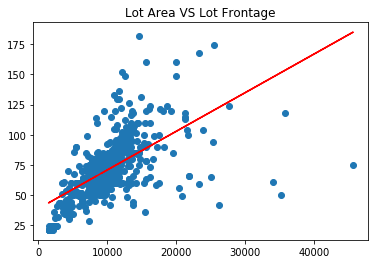

In [235]:
#Filling in Lot Frontage null values with values derived from the linear relationship to Lot Area
#Fitted Line to fit relationship between Lot Frontage and Lot Area
x=ames_test_df[ames_test_df['Lot Frontage'].isnull()==False]['Lot Area']
y=ames_test_df[ames_test_df['Lot Frontage'].isnull()==False]['Lot Frontage']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.scatter(x,y)
plt.title('Lot Area VS Lot Frontage')
plt.plot(x,intercept+slope*x,'r',label='fitted line')
print(slope,intercept)

In [236]:
ames_test_df['Lot Frontage'] = ames_test_df.apply(lambda row: round(row['Lot Area']*0.0032088208435952993 +38.66369737270813,1)if np.isnan(row['Lot Frontage']) else row['Lot Frontage'],axis =1)

In [237]:
ames_test_df = ames_test_df.append(a, ignore_index=False)

In [238]:
ames_test_df.shape

(878, 80)

In [239]:
ames_test_df.isnull().sum()[ames_test_df.isnull().sum() != 0]

Alley             820
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           874
Fence             706
Misc Feature      837
dtype: int64

In [240]:
#Substitute NaN values of features with NA 
ames_test_df['Alley'] = ['NA' if (str(ames_test_df.loc[i,'Alley']) == "nan" ) else ames_test_df.loc[i, 'Alley'] for i in ames_test_df.index]
ames_test_df['Fence'] = ['NA' if (str(ames_test_df.loc[i,'Fence']) == "nan" ) else ames_test_df.loc[i, 'Fence'] for i in ames_test_df.index]
ames_test_df["Fireplace Qu"] = ["NA" if (str(ames_test_df.loc[i, "Fireplace Qu"]) == "nan" and ames_test_df.loc[i,"Fireplaces"] == 0) else ames_test_df.loc[i, "Fireplace Qu"] for i in ames_test_df.index]
ames_test_df['Garage Type']=["NA" if (str(ames_test_df.loc[i, "Garage Type"]) == "nan" ) else ames_test_df.loc[i, "Garage Type"] for i in ames_test_df.index]
ames_test_df['Garage Qual']=["NA" if (str(ames_test_df.loc[i, "Garage Qual"]) == "nan" ) else ames_test_df.loc[i, "Garage Qual"] for i in ames_test_df.index]
ames_test_df['Garage Yr Blt'] = ames_test_df.apply(lambda row: row['Year Built'] if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)
ames_test_df['Garage Finish']=["NA" if (str(ames_test_df.loc[i, "Garage Finish"]) == "nan" ) else ames_test_df.loc[i, "Garage Finish"] for i in ames_test_df.index]
ames_test_df['Garage Cond']=["NA" if (str(ames_test_df.loc[i, "Garage Cond"]) == "nan" ) else ames_test_df.loc[i, "Garage Cond"] for i in ames_test_df.index]
ames_test_df['Bsmt Exposure']=["NA" if (str(ames_test_df.loc[i, "Bsmt Exposure"]) == "nan" ) else ames_test_df.loc[i, "Bsmt Exposure"] for i in ames_test_df.index]
ames_test_df['Bsmt Qual']=["NA" if (str(ames_test_df.loc[i, "Bsmt Qual"]) == "nan" ) else ames_test_df.loc[i, "Bsmt Qual"] for i in ames_test_df.index]
ames_test_df['BsmtFin Type 2']=["NA" if (str(ames_test_df.loc[i, "BsmtFin Type 2"]) == "nan" ) else ames_test_df.loc[i, "BsmtFin Type 2"] for i in ames_test_df.index]
ames_test_df['BsmtFin Type 1']=["NA" if (str(ames_test_df.loc[i, "BsmtFin Type 1"]) == "nan" ) else ames_test_df.loc[i, "BsmtFin Type 1"] for i in ames_test_df.index]
ames_test_df['Bsmt Cond']=["NA" if (str(ames_test_df.loc[i, "Bsmt Cond"]) == "nan" ) else ames_test_df.loc[i, "Bsmt Cond"] for i in ames_test_df.index]


In [241]:
ames_test_df.isnull().sum()[ames_test_df.isnull().sum() != 0]

Mas Vnr Type      1
Mas Vnr Area      1
Electrical        1
Pool QC         874
Misc Feature    837
dtype: int64

In [242]:
ames_test_df["Mas Vnr Type"] = ["None" if (str(ames_test_df.loc[i, "Mas Vnr Type"]) == "nan" ) else ames_test_df.loc[i, "Mas Vnr Type"] for i in ames_test_df.index]
ames_test_df["Mas Vnr Area"] = [0.0 if (str(ames_test_df.loc[i, "Mas Vnr Area"]) == "nan" ) else ames_test_df.loc[i, "Mas Vnr Area"] for i in ames_test_df.index]

In [243]:
ames_test_df.isnull().sum()[ames_test_df.isnull().sum() != 0]

Electrical        1
Pool QC         874
Misc Feature    837
dtype: int64

In [244]:
ames_test_df["Pool QC"] = ["NA" if (str(ames_test_df.loc[i, "Pool QC"]) == "nan" and ames_test_df.loc[i,"Pool Area"] == 0) else ames_test_df.loc[i, "Pool QC"] for i in ames_test_df.index]

In [245]:
ames_test_df.isnull().sum()[ames_test_df.isnull().sum() != 0]

Electrical        1
Misc Feature    837
dtype: int64

In [246]:
ames_test_df["Electrical"] = ['SBrkr' if (str(ames_test_df.loc[i,"Electrical"]) == "nan") else ames_test_df.loc[i,"Electrical"] for i in ames_test_df.index]
ames_test_df["Misc Feature"] = ['NA' if (str(ames_test_df.loc[i,"Misc Feature"]) == "nan" and ames_test_df.loc[i,"Misc Val"] == 0) else ames_test_df.loc[i,"Misc Feature"] for i in ames_test_df.index]

In [247]:
ames_test_df.isnull().sum()[ames_test_df.isnull().sum() != 0]

Series([], dtype: int64)

In [248]:
#All Null values are resolved  

In [249]:
#Dummify ordinal catergories

In [250]:
le.fit(ames_test_df['Street'])
ames_test_df['Street']=le.transform(ames_test_df['Street'])
le.fit(ames_test_df['Utilities'])
ames_test_df['Utilities']=le.transform(ames_test_df['Utilities'])
le.fit(ames_test_df["Exter Qual"])
ames_test_df["Exter Qual"]=le.transform(ames_test_df["Exter Qual"])
le.fit(ames_test_df["Exter Cond"])
ames_test_df["Exter Cond"]=le.transform(ames_test_df["Exter Cond"])
le.fit(ames_test_df["Bsmt Qual"])
ames_test_df["Bsmt Qual"]=le.transform(ames_test_df["Bsmt Qual"])
le.fit(ames_test_df["Bsmt Cond"])
ames_test_df["Bsmt Cond"]=le.transform(ames_test_df["Bsmt Cond"])
le.fit(ames_test_df["Bsmt Exposure"])
ames_test_df["Bsmt Exposure"]=le.transform(ames_test_df["Bsmt Exposure"])
le.fit(ames_test_df["BsmtFin Type 1"])
ames_test_df["BsmtFin Type 1"]=le.transform(ames_test_df["BsmtFin Type 1"])
le.fit(ames_test_df["BsmtFin Type 2"])
ames_test_df["BsmtFin Type 2"]=le.transform(ames_test_df["BsmtFin Type 2"])
le.fit(ames_test_df["Heating QC"])
ames_test_df["Heating QC"]=le.transform(ames_test_df["Heating QC"])
le.fit(ames_test_df["Heating"])
ames_test_df["Heating"]=le.transform(ames_test_df["Heating"])
le.fit(ames_test_df["Central Air"])
ames_test_df["Central Air"]=le.transform(ames_test_df["Central Air"])
le.fit(ames_test_df["Electrical"])
ames_test_df["Electrical"]=le.transform(ames_test_df["Electrical"])
le.fit(ames_test_df["Kitchen Qual"])
ames_test_df["Kitchen Qual"]=le.transform(ames_test_df["Kitchen Qual"])
le.fit(ames_test_df["Functional"])
ames_test_df["Functional"]=le.transform(ames_test_df["Functional"])
ames_test_df['MS SubClass']=ames_test_df['MS SubClass'].astype(int)
le.fit(ames_test_df["MS Zoning"])
ames_test_df["MS Zoning"]=le.transform(ames_test_df["MS Zoning"])
le.fit(ames_test_df["Fireplace Qu"])
ames_test_df["Fireplace Qu"]=le.transform(ames_test_df["Fireplace Qu"])
le.fit(ames_test_df["Garage Finish"])
ames_test_df["Garage Finish"]=le.transform(ames_test_df["Garage Finish"])
le.fit(ames_test_df["Garage Qual"])
ames_test_df["Garage Qual"]=le.transform(ames_test_df["Garage Qual"])
le.fit(ames_test_df["Garage Cond"])
ames_test_df["Garage Cond"]=le.transform(ames_test_df["Garage Cond"])
le.fit(ames_test_df["Paved Drive"])
ames_test_df["Paved Drive"]=le.transform(ames_test_df["Paved Drive"])
le.fit(ames_test_df["Pool QC"])
ames_test_df["Pool QC"]=le.transform(ames_test_df["Pool QC"])
le.fit(ames_test_df["Alley"])
ames_test_df["Alley"]=le.transform(ames_test_df["Alley"])
le.fit(ames_test_df["Land Contour"])
ames_test_df["Land Contour"]=le.transform(ames_test_df["Land Contour"])
le.fit(ames_test_df["Land Slope"])
ames_test_df["Land Slope"]=le.transform(ames_test_df["Land Slope"])
le.fit(ames_test_df["Neighborhood"])
ames_test_df["Neighborhood"]=le.transform(ames_test_df["Neighborhood"])
le.fit(ames_test_df["Condition 1"])
ames_test_df["Condition 1"]=le.transform(ames_test_df["Condition 1"])
le.fit(ames_test_df["Condition 2"])
ames_test_df["Condition 2"]=le.transform(ames_test_df["Condition 2"])
le.fit(ames_test_df["Bldg Type"])
ames_test_df["Bldg Type"]=le.transform(ames_test_df["Bldg Type"])
le.fit(ames_test_df["House Style"])
ames_test_df["House Style"]=le.transform(ames_test_df["House Style"])
le.fit(ames_test_df["Roof Style"])
ames_test_df["Roof Style"]=le.transform(ames_test_df["Roof Style"])
le.fit(ames_test_df["Roof Matl"])
ames_test_df["Roof Matl"]=le.transform(ames_test_df["Roof Matl"])
le.fit(ames_test_df["Exterior 1st"])
ames_test_df["Exterior 1st"]=le.transform(ames_test_df["Exterior 1st"])
le.fit(ames_test_df["Exterior 2nd"])
ames_test_df["Exterior 2nd"]=le.transform(ames_test_df["Exterior 2nd"])
le.fit(ames_test_df["Mas Vnr Type"])
ames_test_df["Mas Vnr Type"]=le.transform(ames_test_df["Mas Vnr Type"])
le.fit(ames_test_df["Foundation"])
ames_test_df["Foundation"]=le.transform(ames_test_df["Foundation"])
le.fit(ames_test_df["Garage Type"])
ames_test_df["Garage Type"]=le.transform(ames_test_df["Garage Type"])
le.fit(ames_test_df["Exterior 2nd"])
ames_test_df["Exterior 2nd"]=le.transform(ames_test_df["Exterior 2nd"])
le.fit(ames_test_df["Fence"])
ames_test_df["Fence"]=le.transform(ames_test_df["Fence"])
le.fit(ames_test_df["Lot Shape"])
ames_test_df["Lot Shape"]=le.transform(ames_test_df["Lot Shape"])
le.fit(ames_test_df["Lot Config"])
ames_test_df["Lot Config"]=le.transform(ames_test_df["Lot Config"])
le.fit(ames_test_df["Misc Feature"])
ames_test_df["Misc Feature"]=le.transform(ames_test_df["Misc Feature"])
le.fit(ames_test_df["Sale Type"])
ames_test_df["Sale Type"]=le.transform(ames_test_df["Sale Type"])

In [251]:
ames_test_df['Id']=ames_test_df['Id'].astype(str)
ames_test_df['PID']=ames_test_df['PID'].astype(str)

In [252]:
ames_test_df.dtypes

Id                  object
PID                 object
MS SubClass          int32
MS Zoning            int32
Lot Frontage       float64
Lot Area             int64
Street               int32
Alley                int32
Lot Shape            int32
Land Contour         int32
Utilities            int32
Lot Config           int32
Land Slope           int32
Neighborhood         int32
Condition 1          int32
Condition 2          int32
Bldg Type            int32
House Style          int32
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style           int32
Roof Matl            int32
Exterior 1st         int32
Exterior 2nd         int64
Mas Vnr Type         int32
Mas Vnr Area       float64
Exter Qual           int32
Exter Cond           int32
Foundation           int32
Bsmt Qual            int32
Bsmt Cond            int32
Bsmt Exposure        int32
BsmtFin Type 1       int32
BsmtFin SF 1         int64
BsmtFin Type 2       int32
B

In [253]:
# Combining Highly correlating columns
ames_test_df['Garage_attr']=ames_test_df['Garage Area']*ames_test_df['Garage Cars']
ames_test_df['Year_attr']=ames_test_df['Year Built']*ames_test_df['Garage Yr Blt']
ames_test_df['Exterior_attr']=ames_test_df['Exterior 1st']*ames_test_df['Exterior 2nd']
ames_test_df['Total_SF']=ames_test_df['Total Bsmt SF']*ames_test_df['1st Flr SF']
ames_test_df['Total_Grd_attr']=ames_test_df['TotRms AbvGrd']*ames_test_df['Gr Liv Area']
ames_test_df['House Age']=2010-ames_test_df['Year Built']
ames_test_df.drop(['Garage Area','Garage Cars','Year Built','Garage Yr Blt','Exterior 1st','Exterior 2nd','Total Bsmt SF','1st Flr SF','TotRms AbvGrd','Gr Liv Area'],axis=1,inplace=True)

In [254]:
#Polynomial Features
ames_test_df['Year_attr_squared']=ames_test_df['Year_attr']**2
ames_test_df['Year_Remod/Add_squared']=ames_test_df['Year Remod/Add']**2

In [255]:
ames_test_df

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Garage_attr,Year_attr,Exterior_attr,Total_SF,Total_Grd_attr,House Age,Year_attr_squared,Year_Remod/Add_squared
0,2658,902301120,190,5,69.0,9142,1,0,3,3,0,4,0,18,2,1,1,5,6,8,1950,1,0,3,0.0,3,1,4,1,3,4,6,0,6,0,1020,1,2,0,2,1020,0,0,0,2,0,4,2,1,5,0,3,5,3,3,4,2,0,60,112,0,0,0,1,4,1,0,4,2006,9,440,3648100.0,0,926160,17352,100,1.330863e+13,3802500
1,2718,905108090,90,4,69.7,9662,1,1,0,3,0,4,0,20,2,1,2,2,5,4,1977,1,0,3,0.0,3,4,1,2,3,4,6,0,6,0,1967,1,3,1,3,0,0,0,0,2,0,6,2,4,5,0,3,1,0,4,5,2,170,0,0,0,0,0,1,4,1,0,8,2006,9,1160,3908529.0,70,3869089,19670,33,1.527660e+13,3908529
2,2414,528218130,60,4,58.0,17104,1,1,0,3,0,4,0,8,2,1,0,5,7,5,2006,1,0,3,0.0,2,4,2,2,1,0,2,554,6,0,100,1,0,1,3,832,0,1,0,2,1,3,1,2,5,1,2,1,2,4,5,2,100,24,0,0,0,0,1,4,1,0,9,2006,6,852,4024036.0,130,434256,10472,4,1.619287e+13,4024036
3,1989,902207150,30,5,60.0,8520,1,1,3,3,0,4,0,18,2,1,0,2,5,6,2006,1,0,3,0.0,2,4,1,5,3,4,6,0,6,0,968,1,3,1,3,0,0,0,0,1,0,2,1,4,5,0,3,5,3,0,5,0,0,0,184,0,0,0,1,4,1,0,7,2007,9,960,3721005.0,154,937024,4840,87,1.384588e+13,4024036
4,625,535105100,20,4,69.1,9500,1,1,0,3,0,4,0,13,2,1,0,2,6,5,1963,1,0,1,247.0,3,4,1,2,3,4,1,609,6,0,785,1,2,1,3,0,0,1,0,1,1,3,1,4,5,2,2,1,2,4,5,2,0,76,0,0,185,0,1,4,1,0,7,2009,9,1028,3853369.0,70,1943236,8364,47,1.484845e+13,3853369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1234,535126140,60,4,90.0,14670,1,1,3,3,0,4,0,13,2,1,0,5,6,7,1999,1,0,1,410.0,2,2,1,5,3,4,1,575,6,0,529,1,0,1,3,884,0,0,0,2,1,4,1,2,5,1,2,1,2,4,5,2,0,230,0,0,0,0,1,2,1,0,8,2008,9,960,3865156.0,130,1218816,17892,44,1.493943e+13,3996001
875,1373,904100040,20,4,55.0,8250,1,1,3,3,0,4,0,20,1,1,0,2,5,5,1968,3,0,3,0.0,3,4,1,5,3,4,1,250,3,492,210,1,0,1,3,0,0,0,0,1,0,3,1,4,5,1,5,1,3,4,5,2,0,63,0,0,0,0,1,4,1,0,8,2008,9,322,3873024.0,30,1152872,6055,42,1.500031e+13,3873024
876,1672,527425140,20,4,60.0,9000,1,1,3,3,0,2,0,13,2,1,0,2,4,6,1971,1,0,3,0.0,3,4,2,5,3,4,0,616,6,0,248,1,3,1,3,0,0,0,0,1,0,3,1,4,5,0,3,5,3,4,5,2,0,0,0,0,0,0,1,1,1,0,5,2007,9,1056,3890754.0,30,746496,4320,39,1.513797e+13,3884841
877,1939,535327160,20,4,70.0,8400,1,1,3,3,0,0,0,13,2,1,0,2,5,5,1955,1,0,3,0.0,3,2,1,5,3,4,1,793,6,0,130,1,3,1,3,0,0,1,0,1,0,3,1,4,5,2,5,1,3,4,5,2,81,0,0,0,0,0,1,1,1,0,3,2007,9,390,3822025.0,48,853775,4625,55,1.460788e+13,3822025


## Scale test data

In [256]:
X_test=ames_test_df.drop(['Id','PID'],axis=1)
sc=StandardScaler()
sc.fit(X_test)
X_scaled_test=sc.transform(X_test)

In [257]:
X_scaled_ames_test_df=pd.DataFrame(list(X_scaled_test))
test_modified=X_scaled_ames_test_df
test_modified.columns=list(X_test.columns)
test_modified[['Id','PID']]=ames_test_df[['Id','PID']]

In [258]:
test_modified

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Garage_attr,Year_attr,Exterior_attr,Total_SF,Total_Grd_attr,House Age,Year_attr_squared,Year_Remod/Add_squared,Id,PID
0,3.120753,1.218369,-0.072655,-0.116539,0.075679,-3.843010,0.736348,0.314560,-0.033768,0.597935,-0.216642,0.785378,-0.053734,0.019488,0.377635,0.997824,-0.036625,2.157251,-1.683931,-0.463553,-0.134915,0.500091,-0.567521,0.662898,-3.567016,3.466738,-1.251303,0.327748,0.685332,1.246442,-1.007121,0.359846,-0.301889,1.128982,-0.096896,0.523697,-3.868286,-1.108456,1.551978,-0.083828,-0.830056,-0.24312,0.823523,-0.788376,1.349887,4.253806,-1.506852,0.263268,-0.924179,-0.111756,1.28533,0.918791,-0.705800,-0.897535,0.322506,-0.771435,0.189742,1.201172,-0.104133,-0.279956,-0.063043,0.033768,0.465208,-0.214169,-0.088203,-0.834055,-1.375733,0.348086,-0.713276,-2.254416,-1.809644,-0.394537,1.190235,1.991272,-2.212435,-1.678359,2658,902301120
1,0.751722,0.009637,-0.048169,-0.064523,0.075679,0.053252,-1.402064,0.314560,-0.033768,0.597935,-0.216642,1.100246,-0.053734,0.019488,1.186328,-0.560130,-0.767467,-1.388030,-0.362932,-0.463553,-0.134915,0.500091,-0.567521,0.662898,0.362520,-0.536501,-0.678794,0.327748,0.685332,1.246442,-1.007121,0.359846,-0.301889,3.352355,-0.096896,1.270136,0.258512,0.275932,-0.805101,-0.083828,-0.830056,-0.24312,0.823523,-0.788376,3.758832,4.253806,0.907411,0.263268,-0.924179,-0.111756,-0.78061,-1.558277,0.328745,0.296458,0.322506,0.632217,-0.690771,-0.328721,-0.104133,-0.279956,-0.063043,0.033768,0.465208,-0.214169,-0.088203,0.680527,-1.375733,0.348086,0.274069,0.143905,-0.422160,2.670732,1.581756,-0.214229,0.131133,-0.368255,2718,905108090
2,0.041013,0.009637,-0.457447,0.679902,0.075679,0.053252,-1.402064,0.314560,-0.033768,0.597935,-0.216642,-0.788964,-0.053734,0.019488,-0.431057,0.997824,0.694217,-0.501710,1.055919,-0.463553,-0.134915,0.500091,-0.567521,-0.848854,0.362520,0.797912,-0.678794,-2.439202,-1.883383,-0.544681,0.257120,0.359846,-0.301889,-1.031000,-0.096896,-0.969180,0.258512,0.275932,1.117536,-0.083828,1.057998,-0.24312,0.823523,1.189322,0.145415,-0.213708,-0.702098,0.263268,0.570166,-0.980087,-0.78061,0.093102,0.328745,0.296458,0.322506,0.054243,-0.338566,-0.328721,-0.104133,-0.279956,-0.063043,0.033768,0.465208,-0.214169,-0.088203,1.059172,-1.375733,-1.300940,-0.148295,1.207622,0.767112,-0.906889,0.028170,-1.168849,1.222277,1.058959,2414,528218130
3,-0.669697,1.218369,-0.387485,-0.178757,0.075679,0.053252,0.736348,0.314560,-0.033768,0.597935,-0.216642,0.785378,-0.053734,0.019488,-0.431057,-0.560130,-0.767467,0.384611,1.055919,-0.463553,-0.134915,0.500091,-0.567521,-0.848854,0.362520,-0.536501,1.038732,0.327748,0.685332,1.246442,-1.007121,0.359846,-0.301889,1.006896,-0.096896,1.270136,0.258512,0.275932,-0.805101,-0.083828,-0.830056,-0.24312,-0.966213,-0.788376,-1.059058,-0.213708,0.907411,0.263268,-0.924179,-0.111756,1.28533,0.918791,-3.809437,0.296458,-3.378933,-0.771435,-0.690771,2.184675,-0.104133,-0.279956,-0.063043,0.033768,0.465208,-0.214169,-0.088203,0.301881,-0.622212,0.348086,-0.000194,-1.583026,1.242821,-0.383221,-0.923101,1.563339,-1.572653,1.058959,1989,902207150
4,-0.906600,0.009637,-0.069157,-0.080728,0.075679,0.053252,-1.402064,0.314560,-0.033768,0.597935,-0.216642,-0.001793,-0.053734,0.019488,-

In [259]:
#Moving ID column to the first of the table
cols = list(test_modified.columns)
cols = [cols[-1]] + cols[:-1]
test_modified = test_modified[cols]

In [260]:
#Moving PID column to the first of the table
cols = list(test_modified.columns)
cols = [cols[-1]] + cols[:-1]
test_modified = test_modified[cols]

In [261]:
test_modified

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Garage_attr,Year_attr,Exterior_attr,Total_SF,Total_Grd_attr,House Age,Year_attr_squared,Year_Remod/Add_squared
0,2658,902301120,3.120753,1.218369,-0.072655,-0.116539,0.075679,-3.843010,0.736348,0.314560,-0.033768,0.597935,-0.216642,0.785378,-0.053734,0.019488,0.377635,0.997824,-0.036625,2.157251,-1.683931,-0.463553,-0.134915,0.500091,-0.567521,0.662898,-3.567016,3.466738,-1.251303,0.327748,0.685332,1.246442,-1.007121,0.359846,-0.301889,1.128982,-0.096896,0.523697,-3.868286,-1.108456,1.551978,-0.083828,-0.830056,-0.24312,0.823523,-0.788376,1.349887,4.253806,-1.506852,0.263268,-0.924179,-0.111756,1.28533,0.918791,-0.705800,-0.897535,0.322506,-0.771435,0.189742,1.201172,-0.104133,-0.279956,-0.063043,0.033768,0.465208,-0.214169,-0.088203,-0.834055,-1.375733,0.348086,-0.713276,-2.254416,-1.809644,-0.394537,1.190235,1.991272,-2.212435,-1.678359
1,2718,905108090,0.751722,0.009637,-0.048169,-0.064523,0.075679,0.053252,-1.402064,0.314560,-0.033768,0.597935,-0.216642,1.100246,-0.053734,0.019488,1.186328,-0.560130,-0.767467,-1.388030,-0.362932,-0.463553,-0.134915,0.500091,-0.567521,0.662898,0.362520,-0.536501,-0.678794,0.327748,0.685332,1.246442,-1.007121,0.359846,-0.301889,3.352355,-0.096896,1.270136,0.258512,0.275932,-0.805101,-0.083828,-0.830056,-0.24312,0.823523,-0.788376,3.758832,4.253806,0.907411,0.263268,-0.924179,-0.111756,-0.78061,-1.558277,0.328745,0.296458,0.322506,0.632217,-0.690771,-0.328721,-0.104133,-0.279956,-0.063043,0.033768,0.465208,-0.214169,-0.088203,0.680527,-1.375733,0.348086,0.274069,0.143905,-0.422160,2.670732,1.581756,-0.214229,0.131133,-0.368255
2,2414,528218130,0.041013,0.009637,-0.457447,0.679902,0.075679,0.053252,-1.402064,0.314560,-0.033768,0.597935,-0.216642,-0.788964,-0.053734,0.019488,-0.431057,0.997824,0.694217,-0.501710,1.055919,-0.463553,-0.134915,0.500091,-0.567521,-0.848854,0.362520,0.797912,-0.678794,-2.439202,-1.883383,-0.544681,0.257120,0.359846,-0.301889,-1.031000,-0.096896,-0.969180,0.258512,0.275932,1.117536,-0.083828,1.057998,-0.24312,0.823523,1.189322,0.145415,-0.213708,-0.702098,0.263268,0.570166,-0.980087,-0.78061,0.093102,0.328745,0.296458,0.322506,0.054243,-0.338566,-0.328721,-0.104133,-0.279956,-0.063043,0.033768,0.465208,-0.214169,-0.088203,1.059172,-1.375733,-1.300940,-0.148295,1.207622,0.767112,-0.906889,0.028170,-1.168849,1.222277,1.058959
3,1989,902207150,-0.669697,1.218369,-0.387485,-0.178757,0.075679,0.053252,0.736348,0.314560,-0.033768,0.597935,-0.216642,0.785378,-0.053734,0.019488,-0.431057,-0.560130,-0.767467,0.384611,1.055919,-0.463553,-0.134915,0.500091,-0.567521,-0.848854,0.362520,-0.536501,1.038732,0.327748,0.685332,1.246442,-1.007121,0.359846,-0.301889,1.006896,-0.096896,1.270136,0.258512,0.275932,-0.805101,-0.083828,-0.830056,-0.24312,-0.966213,-0.788376,-1.059058,-0.213708,0.907411,0.263268,-0.924179,-0.111756,1.28533,0.918791,-3.809437,0.296458,-3.378933,-0.771435,-0.690771,2.184675,-0.104133,-0.279956,-0.063043,0.033768,0.465208,-0.214169,-0.088203,0.301881,-0.622212,0.348086,-0.000194,-1.583026,1.242821,-0.383221,-0.923101,1.563339,-1.572653,1.058959
4,625,535105100,-0.906600,0.009637,-0.069157,-0.080728,0.075679,0.053252,-1.402064,0.314560,-0.033768,0.597935,-0.216642,-0.001793,-0.053

In [262]:
#Save the edited test data as a separate csv document
test_modified.to_csv('../datasets/test_modified.csv',sep=",",index=False)